# 1. Project Introduction and Objectives
This notebook supports the MSc Capstone Project focused on crime data analysis in Essex.
**Objectives:**
- Analyse crime trends using Police UK data (2022–2024)
- Forecast future crime using SARIMA
- Identify crime hotspots via clustering
- Develop a Retrieval-Augmented Generation (RAG) chatbot for crime data queries

# 2. Data Collection
This section covers loading structured crime data from the Police UK API and local CSV exports.

In [1]:
import requests

# Base API URL
BASE_URL = "https://data.police.uk/api"

# Function to count and list available police forces
def count_police_forces():
    url = f"{BASE_URL}/forces"
    response = requests.get(url)

    if response.status_code == 200:
        forces = response.json()
        total_forces = len(forces)
        
        print(f"🚓 Total number of police forces: {total_forces}\n")
        print("📌 List of Police Forces:")
        for force in forces:
            print(f"   - {force['name']}")
        
        return total_forces, forces #returning values to be used later on 
    else:
        print(f"❌ Error fetching police forces: {response.status_code}")
        return 0, []

count_police_forces()


🚓 Total number of police forces: 44

📌 List of Police Forces:
   - Avon and Somerset Constabulary
   - Bedfordshire Police
   - Cambridgeshire Constabulary
   - Cheshire Constabulary
   - City of London Police
   - Cleveland Police
   - Cumbria Constabulary
   - Derbyshire Constabulary
   - Devon & Cornwall Police
   - Dorset Police
   - Durham Constabulary
   - Dyfed-Powys Police
   - Essex Police
   - Gloucestershire Constabulary
   - Greater Manchester Police
   - Gwent Police
   - Hampshire Constabulary
   - Hertfordshire Constabulary
   - Humberside Police
   - Kent Police
   - Lancashire Constabulary
   - Leicestershire Police
   - Lincolnshire Police
   - Merseyside Police
   - Metropolitan Police Service
   - Norfolk Constabulary
   - North Wales Police
   - North Yorkshire Police
   - Northamptonshire Police
   - Northumbria Police
   - Nottinghamshire Police
   - Police Service of Northern Ireland
   - South Wales Police
   - South Yorkshire Police
   - Staffordshire Police
 

(44,
 [{'id': 'avon-and-somerset', 'name': 'Avon and Somerset Constabulary'},
  {'id': 'bedfordshire', 'name': 'Bedfordshire Police'},
  {'id': 'cambridgeshire', 'name': 'Cambridgeshire Constabulary'},
  {'id': 'cheshire', 'name': 'Cheshire Constabulary'},
  {'id': 'city-of-london', 'name': 'City of London Police'},
  {'id': 'cleveland', 'name': 'Cleveland Police'},
  {'id': 'cumbria', 'name': 'Cumbria Constabulary'},
  {'id': 'derbyshire', 'name': 'Derbyshire Constabulary'},
  {'id': 'devon-and-cornwall', 'name': 'Devon & Cornwall Police'},
  {'id': 'dorset', 'name': 'Dorset Police'},
  {'id': 'durham', 'name': 'Durham Constabulary'},
  {'id': 'dyfed-powys', 'name': 'Dyfed-Powys Police'},
  {'id': 'essex', 'name': 'Essex Police'},
  {'id': 'gloucestershire', 'name': 'Gloucestershire Constabulary'},
  {'id': 'greater-manchester', 'name': 'Greater Manchester Police'},
  {'id': 'gwent', 'name': 'Gwent Police'},
  {'id': 'hampshire', 'name': 'Hampshire Constabulary'},
  {'id': 'hertfordsh

In [13]:
import os
import pandas as pd

# 📂 Folder containing CSV files
folder_path = "C:/Users/chris/Documents/Notebook Files/Capstone Project/CrimeDataEssex22-24"  

# 📌 List all CSV files in the folder
csv_files = [f for f in os.listdir(folder_path) if f.endswith(".csv")]

# 📢 Debug: Print found files
print(f"🔍 Found {len(csv_files)} CSV files: {csv_files}")

# 🏗️ Create an empty list to store DataFrames
dataframes = []

# 🔄 Loop through each CSV file and read it
for file in csv_files:
    file_path = os.path.join(folder_path, file)
    #CSV file into a DataFrame
    df = pd.read_csv(file_path)
    #Appending the DataFrame to the list
    dataframes.append(df)

# 🏗️ Merge all DataFrames into one
merged_df = pd.concat(dataframes, ignore_index=True)

# 💾 Save the merged DataFrame to a new CSV file
output_file = "EssexCrimeData22-24.csv" #Change name when appropriate
merged_df.to_csv(output_file, index=False)

print(f"\n✅ Merged file saved as {output_file}")


🔍 Found 36 CSV files: ['2022-01-essex-street.csv', '2022-02-essex-street.csv', '2022-03-essex-street.csv', '2022-04-essex-street.csv', '2022-05-essex-street.csv', '2022-06-essex-street.csv', '2022-07-essex-street.csv', '2022-08-essex-street.csv', '2022-09-essex-street.csv', '2022-10-essex-street.csv', '2022-11-essex-street.csv', '2022-12-essex-street.csv', '2023-01-essex-street.csv', '2023-02-essex-street.csv', '2023-03-essex-street.csv', '2023-04-essex-street.csv', '2023-05-essex-street.csv', '2023-06-essex-street.csv', '2023-07-essex-street.csv', '2023-08-essex-street.csv', '2023-09-essex-street.csv', '2023-10-essex-street.csv', '2023-11-essex-street.csv', '2023-12-essex-street.csv', '2024-01-essex-street.csv', '2024-02-essex-street.csv', '2024-03-essex-street.csv', '2024-04-essex-street.csv', '2024-05-essex-street.csv', '2024-06-essex-street.csv', '2024-07-essex-street.csv', '2024-08-essex-street.csv', '2024-09-essex-street.csv', '2024-10-essex-street.csv', '2024-11-essex-street.csv

# 3. Data Preprocessing
This step includes data cleaning, feature engineering, and transforming time/date and location values.

## Quick EDA and Mapping to show crime analysis on uncleaned/unprocessed data

🔝 Top 10 Crime Hotspots (2022-01 to 2024-12):
                 LSOA name  Number of Crimes in LSOA
945   Southend-on-Sea 015B                      6109
81           Basildon 015C                      4949
1044         Tendring 016B                      3528
472        Colchester 007D                      2847
940   Southend-on-Sea 014C                      2845
384        Chelmsford 010G                      2554
1139         Thurrock 017D                      2325
97           Basildon 018D                      2297
475        Colchester 007G                      2159
911   Southend-on-Sea 010A                      2138


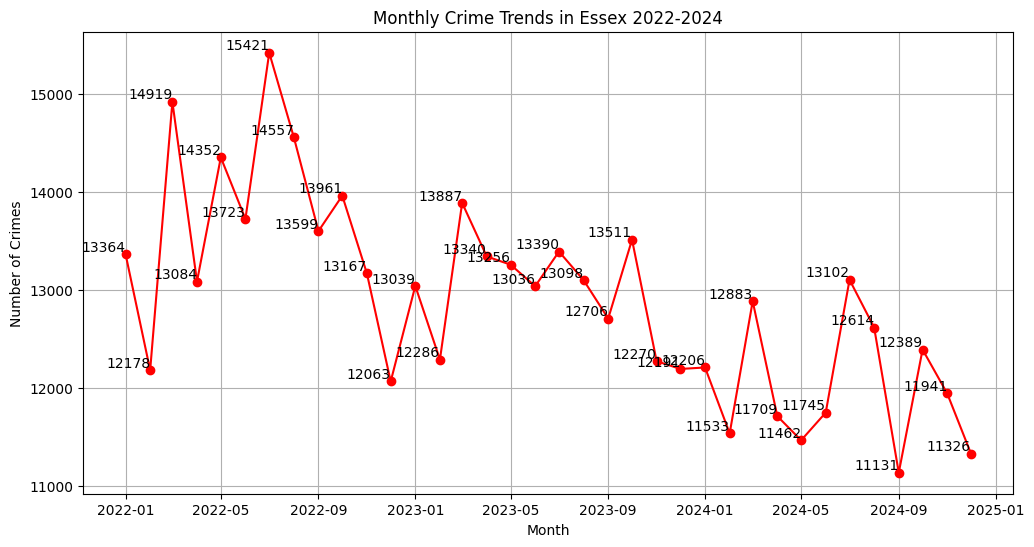

🔥 Crime hotspot heatmap saved as crime_hotspots_map.html


In [2]:
import pandas as pd
import folium
import matplotlib.pyplot as plt
from folium.plugins import HeatMap
from IPython.display import display, IFrame

def analyse_crime_data(csv_file):
    # Loading and cleaning data in dataframe
    df = pd.read_csv(csv_file)
    #df = df.dropna(subset=["Longitude", "Latitude", "Crime type"])  # Remove missing values
    df["Longitude"] = df["Longitude"].astype(float)
    df["Latitude"] = df["Latitude"].astype(float)
    df["Month"] = pd.to_datetime(df["Month"], format="%Y-%m")  # Convert Month to datetime format

    # Showing Top 10 High-Crime Areas (Lower super output areas of Essex)
    time_period = f"{df['Month'].min().strftime('%Y-%m')} to {df['Month'].max().strftime('%Y-%m')}"
    hotspots = df.groupby("LSOA name")["Crime ID"].count().reset_index()
    hotspots = hotspots.sort_values(by="Crime ID", ascending=False).head(10)
    hotspots = hotspots.rename(columns={"Crime ID": "Number of Crimes in LSOA"})
    print(f"🔝 Top 10 Crime Hotspots ({time_period}):")
    print(hotspots)

    # Linegraph showing crime trends by each month 
    crime_trends = df.groupby("Month")["Crime ID"].count()
    plt.figure(figsize=(12, 6))
    plt.plot(crime_trends.index, crime_trends.values, marker="o", linestyle="-", color="red")
    for month, count in zip(crime_trends.index, crime_trends.values):
        plt.text(month, count, str(count), fontsize=10, ha="right", va="bottom", color="black")
    plt.xlabel("Month")
    plt.ylabel("Number of Crimes")
    plt.title("Monthly Crime Trends in Essex 2022-2024")
    plt.grid()
    plt.show()

def mapping_crime_folium(csv_file):
    # Loading and cleaning data in dataframe
    df = pd.read_csv(csv_file)
    df = df.dropna(subset=["Longitude", "Latitude", "Crime type"])  # Remove missing values
    df["Longitude"] = df["Longitude"].astype(float)
    df["Latitude"] = df["Latitude"].astype(float)
    df["Month"] = pd.to_datetime(df["Month"], format="%Y-%m")  # Convert Month to datetime format
    
    # HTML Heat map for crimes 2022-2024
    m = folium.Map(location=[df["Latitude"].mean(), df["Longitude"].mean()], zoom_start=10)
    heat_data = list(zip(df["Latitude"], df["Longitude"]))
    HeatMap(heat_data).add_to(m)

    heatmap_file = "crime_hotspots_map.html"
    m.save(heatmap_file)
    print(f"🔥 Crime hotspot heatmap saved as {heatmap_file}")
    display(IFrame(heatmap_file, width=800, height=600)) #Code to force open another tab to show the map

# Functions to run
analyse_crime_data("EssexCrimeData22-24.csv")
mapping_crime_folium("EssexCrimeData22-24.csv")


### Data Preprocessing/Cleaning for further EDA
* Creating a column to define crimes into the 14 Districts across Essex
* Creating a column defining just year and not yyyy-mm
* Filter Crime that happened in the Essex jurisdiction
* Save multiple files to be called later if needed

In [14]:
import pandas as pd

# Loading the dataset
df = pd.read_csv("EssexCrimeData22-24.csv")

# Function to classify based on first 5 characters
def classify_district(value):
    if isinstance(value, str):  # Ensure it's a string
        prefix = value[:5] # Extract first 5 characters
        if prefix.startswith("Basil"):
            return "Basildon"
        elif prefix.startswith("Brain"):
            return "Braintree"
        elif prefix.startswith("Brent"):
            return "Brentwood"
        elif prefix.startswith("Castl"):
            return "Castle Point"
        elif prefix.startswith("Chelm"):
            return "Chelmsford"
        elif prefix.startswith("Colch"):
            return "Colchester"
        elif prefix.startswith("Harlo"):
            return "Harlow"
        elif prefix.startswith("Eppin"):
            return "Epping Forest"
        elif prefix.startswith("Maldo"):
            return "Maldon"
        elif prefix.startswith("Rochf"):
            return "Rochford"
        elif prefix.startswith("Tendr"):
            return "Tendring"
        elif prefix.startswith("Thurr"):
            return "Thurrock"
        elif prefix.startswith("South"):
            return "Southend"
        elif prefix.startswith("Uttle"):
            return "Uttlesford"
        else:
            return "Other"
    return "Unknown"

# Creating new columns for district and year 
df["District"] = df["LSOA name"].apply(classify_district)
df["Year"] = df["Month"].astype(str).str[:4]

# Save the updated dataset 
df.to_csv("EssexCrimeData22-24.csv", index=False)

#Filter dataframe for crimes that happen with Essex Police juridstriction
df = df[df["Falls within"]=="Essex Police"]

#Filter dataframe to take out crimes not assigned to one of the 14 districts
df = df[df["District"]!="Other"]
df = df[df["District"]!="Unknown"]

# Save the updated dataset to a new file called filtered
df.to_csv("EssexCrimeData22-24_filtered.csv", index=False)

# Display the first 5 rows
print(df.head())


                                            Crime ID    Month   Reported by  \
1  e47bcc769d85bf5bdf5a63c67999218d6e58f0833bf3ef...  2022-01  Essex Police   
2  f3bf5e52bd185831314f199ff1b5c8e66911ac1c5e7225...  2022-01  Essex Police   
3  c77e82a8689abc95e512c2aae9de5070988c191252571b...  2022-01  Essex Police   
4  b853f54acc02cda91a62f552e51118274033c7a4ac654f...  2022-01  Essex Police   
5  c9c095e41b09671f177aa655a8015ce58050e24e2dfbb2...  2022-01  Essex Police   

   Falls within  Longitude   Latitude                        Location  \
1  Essex Police   0.434974  51.643203             On or near Glanmire   
2  Essex Police   0.433851  51.644647      On or near Brookside Close   
3  Essex Police   0.434981  51.647106             On or near The Vale   
4  Essex Police   0.441201  51.628352  On or near Outwood Common Road   
5  Essex Police   0.442264  51.626351   On or near Outwood Farm Close   

   LSOA code      LSOA name                    Crime type  \
1  E01021238  Basildon 00

# 4. Exploratory Data Analysis (EDA)
Visual summaries of the dataset: crime distributions by type, region, and time.


Total Crimes in Essex by Year:
2022: 189,127
2023: 170,931
2024: 158,403

Grand Total Crimes in Essex (2022-2024): 518,461

Total Crimes in Essex: 518,461

Breakdown of Crimes by Type:
Crime type
Violence and sexual offences    205964
Anti-social behaviour            54022
Public order                     41773
Criminal damage and arson        41324
Vehicle crime                    40223
Other theft                      37232
Shoplifting                      33694
Burglary                         20436
Drugs                            16004
Other crime                      10552
Possession of weapons             5060
Robbery                           4382
Bicycle theft                     4261
Theft from the person             3534
Name: count, dtype: int64

Crime Breakdown by Year and Type:
Crime type  Anti-social behaviour  Bicycle theft  Burglary  \
Year                                                         
2022                        24739           1560      6687   
2023      

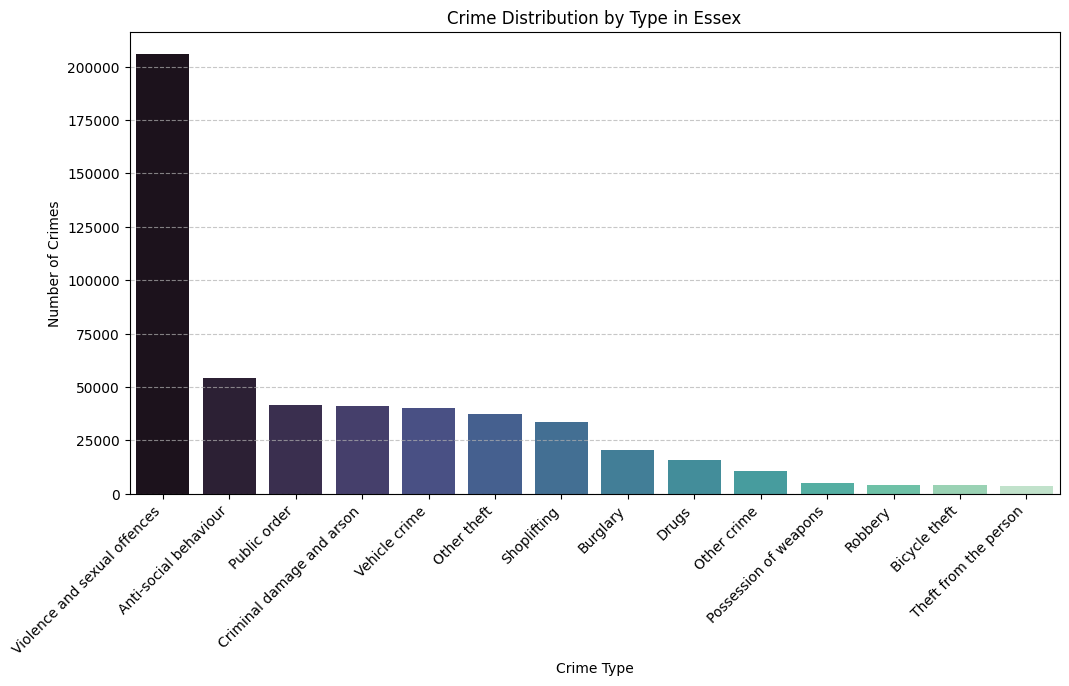

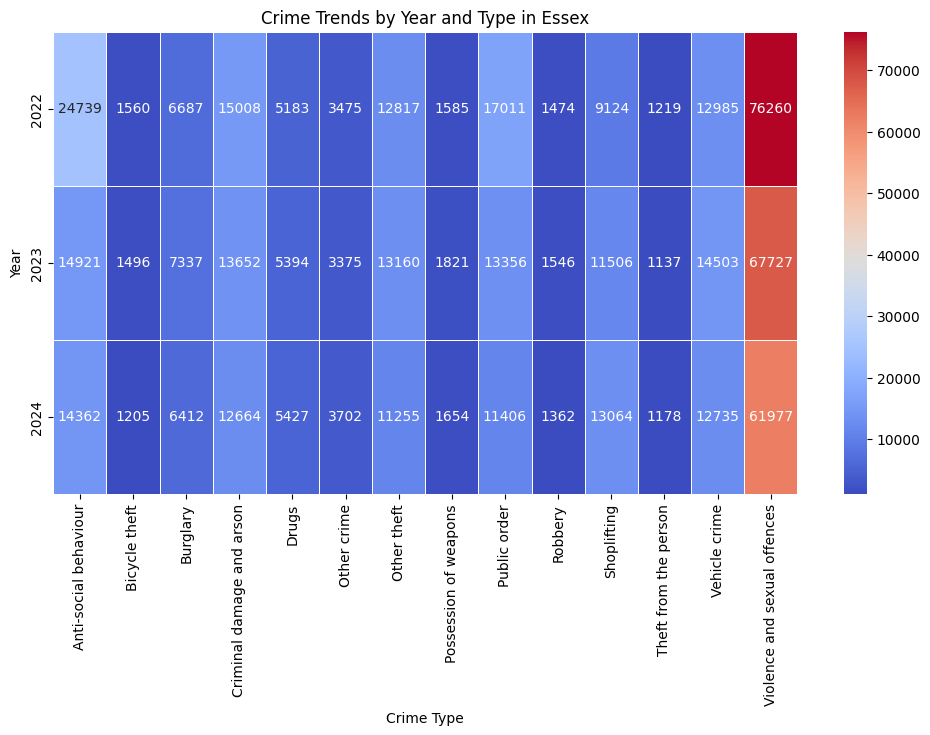


Crime count per district:
District
Southend         62949
Basildon         62436
Colchester       56516
Thurrock         53827
Chelmsford       50490
Tendring         43208
Harlow           34560
Braintree        33926
Epping Forest    32760
Castle Point     18594
Uttlesford       18273
Brentwood        18118
Rochford         14716
Maldon           11197
Name: count, dtype: int64

Percentage of crimes per district:
District
Southend         12.305061
Basildon         12.204781
Colchester       11.047559
Thurrock         10.521923
Chelmsford        9.869617
Tendring          8.446156
Harlow            6.755674
Braintree         6.631742
Epping Forest     6.403816
Castle Point      3.634693
Uttlesford        3.571945
Brentwood         3.541646
Rochford          2.876635
Maldon            2.188752
Name: count, dtype: float64

Number of crimes per district by year:
District  Basildon  Braintree  Brentwood  Castle Point  Chelmsford  \
Year                                                   

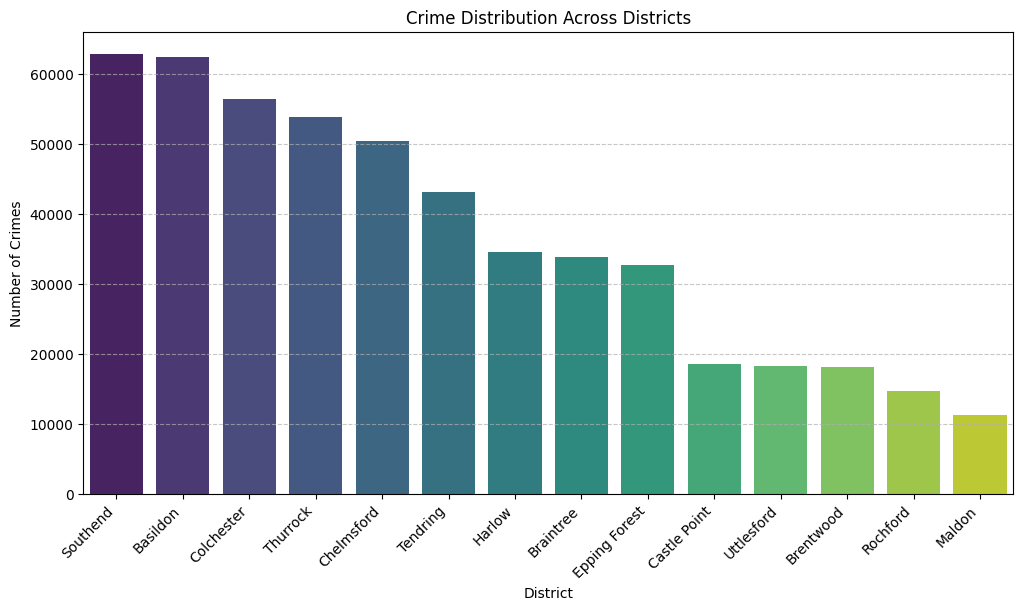

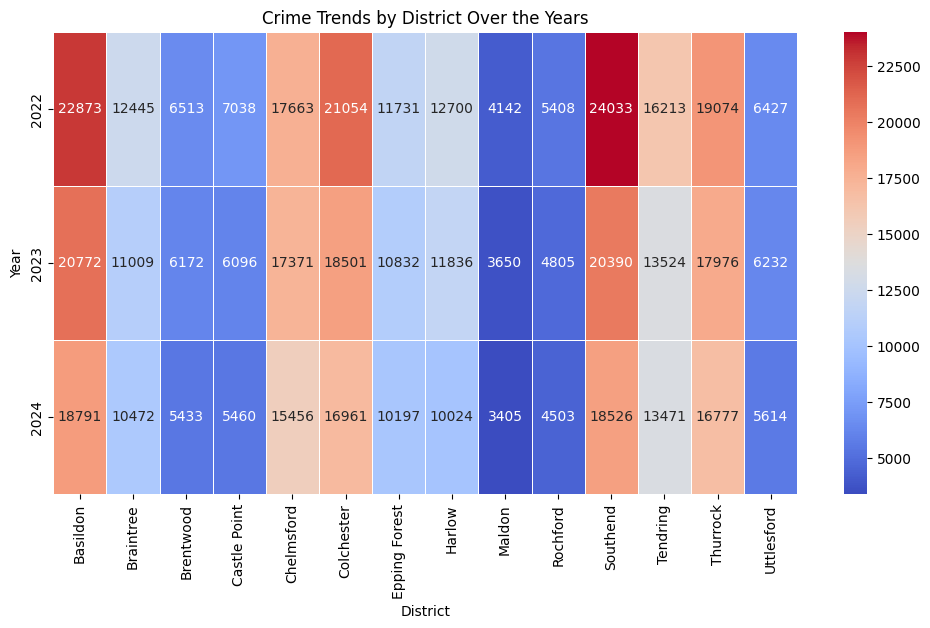

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def total_crimes_by_year(csv_file, year_column="Year"):
    """
    Calculates the total number of crimes in Essex for each year.

    """
    # Load dataset
    df = pd.read_csv(csv_file)

    # Convert Year column to numeric, ensuring no errors occur
    df[year_column] = pd.to_numeric(df[year_column], errors="coerce")
    
    # Drop rows with missing year values
    df = df.dropna(subset=[year_column])
    df[year_column] = df[year_column].astype(int)

    # Filter data for the years 2022, 2023, and 2024
    years_of_interest = [2022, 2023, 2024]
    df_filtered = df[df[year_column].isin(years_of_interest)]

    # Calculate total crimes per year
    total_crimes_per_year = df_filtered[year_column].value_counts().sort_index()

    # Print results
    print("\nTotal Crimes in Essex by Year:")
    for year, count in total_crimes_per_year.items():
        print(f"{year}: {count:,}")

    # Calculate the total across all years
    grand_total = total_crimes_per_year.sum()
    print(f"\nGrand Total Crimes in Essex (2022-2024): {grand_total:,}")

def crime_type_analysis(csv_file, crime_column="Crime type", year_column="Year"):
    """
    Analyse total crime figures for Essex with a breakdown by crime type.

    """
    # Load dataset
    df = pd.read_csv(csv_file)

    # Crime count by type
    crime_counts = df[crime_column].value_counts()
    total_crimes = crime_counts.sum()

    print(f"\nTotal Crimes in Essex: {total_crimes:,}")
    print("\nBreakdown of Crimes by Type:")
    print(crime_counts)

    # Split crime data by year
    crime_by_year = df.groupby([year_column, crime_column]).size().unstack(fill_value=0)
    print("\nCrime Breakdown by Year and Type:")
    print(crime_by_year)

    # Crime percentage per type
    crime_percentage = (crime_counts / total_crimes) * 100
    print("\nPercentage Distribution of Crimes:")
    print(crime_percentage)

    # Bar plot: Crime distribution by type
    plt.figure(figsize=(12, 6))
    sns.barplot(x=crime_counts.index, y=crime_counts.values, palette="mako")
    plt.xticks(rotation=45, ha="right")
    plt.xlabel("Crime Type")
    plt.ylabel("Number of Crimes")
    plt.title("Crime Distribution by Type in Essex")
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()

    # Heatmap: Crime trends over the years
    plt.figure(figsize=(12, 6))
    sns.heatmap(crime_by_year, cmap="coolwarm", annot=True, fmt="d", linewidths=0.5)
    plt.xlabel("Crime Type")
    plt.ylabel("Year")
    plt.title("Crime Trends by Year and Type in Essex")
    plt.show()

def district_crime_eda(csv_file, district_column="District", year_column="Year"):
    """
    Performs Exploratory Data Analysis (EDA) on crime data based on the district and year columns.
    
    """

    # Load dataset
    df = pd.read_csv(csv_file)
    
    # Convert Year column to integer if necessary
    df[year_column] = pd.to_numeric(df[year_column], errors="coerce")
    
    # Drop rows with missing year values after conversion
    df = df.dropna(subset=[year_column])
    df[year_column] = df[year_column].astype(int)  # Ensure Year is an integer

    # Crime count per district
    district_counts = df[district_column].value_counts()
    print("\nCrime count per district:")
    print(district_counts)

    # Crime percentage per district
    district_percentage = (district_counts / district_counts.sum()) * 100
    print("\nPercentage of crimes per district:")
    print(district_percentage)

    # Crime count per district by year
    district_year_counts = df.groupby([year_column, district_column]).size().unstack(fill_value=0)
    print("\nNumber of crimes per district by year:")
    print(district_year_counts)

    # Bar plot: Crime distribution across districts
    plt.figure(figsize=(12, 6))
    sns.barplot(x=district_counts.index, y=district_counts.values, palette="viridis")
    plt.xticks(rotation=45, ha="right")
    plt.xlabel("District")
    plt.ylabel("Number of Crimes")
    plt.title("Crime Distribution Across Districts")
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()

    # Heatmap: Crimes per district over the years
    plt.figure(figsize=(12, 6))
    sns.heatmap(district_year_counts, cmap="coolwarm", annot=True, fmt="d", linewidths=0.5)
    plt.xlabel("District")
    plt.ylabel("Year")
    plt.title("Crime Trends by District Over the Years")
    plt.show()

# Calling functions
# Chance to call the different csv files we have created
total_crimes_by_year("EssexCrimeData22-24.csv")
crime_type_analysis("EssexCrimeData22-24.csv")
district_crime_eda("EssexCrimeData22-24_filtered.csv") #file called to avoid 'Other'/'unknown' locations



In [25]:
############
# Group by Year and Crime type, count entries
df = pd.read_csv("EssexCrimeData22-24.csv")
yearly_crime = df.groupby(["Year", "Crime type"])["Latitude"].count().reset_index()

# Pivot to wide format (Years as rows, Crime types as columns)
pivot_table = yearly_crime.pivot(index="Year", columns="Crime type", values="Latitude").fillna(0)

# Add 'All Crime' column as the total across all crime types
pivot_table["All Crime"] = pivot_table.sum(axis=1)

# Style the table to visually emphasize larger values
Crime_totals_type = pivot_table.style\
    .set_table_styles(
    [{"selector": "td, th", "props": [("font-size", "14px")]}]
    )\
    .background_gradient(cmap="Blues", axis=None)\
    .format("{:.0f}")

# Display result
print("📊 Yearly Total Crimes by Type (Including All Crime):\n")
Crime_totals_type

📊 Yearly Total Crimes by Type (Including All Crime):



Crime type,Anti-social behaviour,Bicycle theft,Burglary,Criminal damage and arson,Drugs,Other crime,Other theft,Possession of weapons,Public order,Robbery,Shoplifting,Theft from the person,Vehicle crime,Violence and sexual offences,All Crime
Year,,,,,,,,,,,,,,,
2022,24739,1535,6612,14869,5113,3440,12667,1571,16832,1454,8928,1202,12891,75623,187476
2023,14921,1480,7249,13526,5332,3343,13023,1805,13203,1521,11270,1108,14426,67089,169296
2024,14362,1183,6255,12372,5325,3642,11054,1622,11106,1320,12641,1137,12571,60641,155231


In [29]:
# Load dataset
df = pd.read_csv("EssexCrimeData22-24.csv")

# Group by Year and Crime type, count entries
yearly_crime = df.groupby(["Year", "Crime type"])["Latitude"].count().reset_index()

# Pivot to wide format (Years as rows, Crime types as columns)
pivot_table = yearly_crime.pivot(index="Year", columns="Crime type", values="Latitude").fillna(0)

# Add 'All Crime' column as the total across all crime types
pivot_table["All Crime"] = pivot_table.sum(axis=1)

# Create a percentage table by dividing by 'All Crime' totals
percentage_table = pivot_table.div(pivot_table["All Crime"], axis=0) * 100
percentage_table = percentage_table.round(2)

# Style the percentage table
crime_percentage_table = percentage_table.style\
    .set_table_styles(
    [{"selector": "td, th", "props": [("font-size", "14px")]}]
    )\
    .background_gradient(cmap="Reds", axis=None)\
    .format("{:.1f}%")

# Display result
print("📊 Yearly % Distribution of Crime Types (Including All Crime % = 100%):\n")
crime_percentage_table


📊 Yearly % Distribution of Crime Types (Including All Crime % = 100%):



Crime type,Anti-social behaviour,Bicycle theft,Burglary,Criminal damage and arson,Drugs,Other crime,Other theft,Possession of weapons,Public order,Robbery,Shoplifting,Theft from the person,Vehicle crime,Violence and sexual offences,All Crime
Year,,,,,,,,,,,,,,,
2022,13.2%,0.8%,3.5%,7.9%,2.7%,1.8%,6.8%,0.8%,9.0%,0.8%,4.8%,0.6%,6.9%,40.3%,100.0%
2023,8.8%,0.9%,4.3%,8.0%,3.1%,2.0%,7.7%,1.1%,7.8%,0.9%,6.7%,0.7%,8.5%,39.6%,100.0%
2024,9.2%,0.8%,4.0%,8.0%,3.4%,2.4%,7.1%,1.0%,7.2%,0.8%,8.1%,0.7%,8.1%,39.1%,100.0%


In [4]:
import pandas as pd

# Load the data
df = pd.read_csv("EssexCrimeData22-24_filtered.csv")

# Filter out 'Violence and sexual offences'
df = df[df["Crime type"] != "Violence and sexual offences"]

# Group by District and Crime Type to get the count of crimes
crime_totals = df.groupby(["District", "Crime type"]).size().unstack(level="Crime type", fill_value=0)

# Format the total crime counts with a color gradient per row (per district)
styled_crime_totals = crime_totals.style\
    .set_table_styles([{"selector": "td, th", "props": [("font-size", "14px")]}])\
    .background_gradient(cmap="Oranges", axis=1)\
    .format("{:.0f}")

# Display result
print("📊 Total Crimes by District and Crime Type (Excluding 'Violence and sexual offences'):\n")
styled_crime_totals

📊 Total Crimes by District and Crime Type (Excluding 'Violence and sexual offences'):



Crime type,Anti-social behaviour,Bicycle theft,Burglary,Criminal damage and arson,Drugs,Other crime,Other theft,Possession of weapons,Public order,Robbery,Shoplifting,Theft from the person,Vehicle crime
District,,,,,,,,,,,,,
Basildon,6594,378,2432,5129,2002,1253,3916,626,5054,599,4457,348,5067
Braintree,3662,162,1353,2692,1219,731,2574,310,2730,197,2003,193,1927
Brentwood,1705,79,1004,1285,610,332,1520,115,1304,117,1501,137,2697
Castle Point,2329,126,650,1662,498,456,1223,169,1436,142,1057,57,1278
Chelmsford,4554,822,2350,3667,1490,1046,3699,436,4111,386,3898,479,3521
Colchester,5846,948,1949,4577,1584,1018,3862,484,4622,478,3447,348,2809
Epping Forest,3516,84,1638,2410,1092,633,2703,264,2571,334,1954,195,4183
Harlow,3260,376,1291,2706,1364,649,2298,420,2914,344,2358,310,2908
Maldon,941,41,476,831,321,273,993,115,945,39,340,32,622


In [6]:
import pandas as pd

# Load the data
df = pd.read_csv("EssexCrimeData22-24_filtered.csv")

# Filter out 'Violence and sexual offences'
df = df[df["Crime type"] != "Violence and sexual offences"]

# Group by District and Crime Type to get the count of crimes
crime_totals = df.groupby(["District", "Crime type"]).size().unstack(level="Crime type", fill_value=0)

# Convert to percentage per district (row-wise)
crime_percentages = crime_totals.div(crime_totals.sum(axis=1), axis=0) * 100
crime_percentages = crime_percentages.round(2)

# Format the percentage values with a color gradient
styled_crime_percentages = crime_percentages.style\
    .set_table_styles([{"selector": "td, th", "props": [("font-size", "16px")]}])\
    .background_gradient(cmap="Blues", axis=1)\
    .format("{:.1f}%")

# Display result
print("📊 % Distribution of Crime Types by District (Excluding 'Violence and sexual offences'):\n")
styled_crime_percentages


📊 % Distribution of Crime Types by District (Excluding 'Violence and sexual offences'):



Crime type,Anti-social behaviour,Bicycle theft,Burglary,Criminal damage and arson,Drugs,Other crime,Other theft,Possession of weapons,Public order,Robbery,Shoplifting,Theft from the person,Vehicle crime
District,,,,,,,,,,,,,
Basildon,17.4%,1.0%,6.4%,13.6%,5.3%,3.3%,10.3%,1.6%,13.3%,1.6%,11.8%,0.9%,13.4%
Braintree,18.5%,0.8%,6.8%,13.6%,6.2%,3.7%,13.0%,1.6%,13.8%,1.0%,10.1%,1.0%,9.8%
Brentwood,13.7%,0.6%,8.1%,10.4%,4.9%,2.7%,12.2%,0.9%,10.5%,0.9%,12.1%,1.1%,21.7%
Castle Point,21.0%,1.1%,5.9%,15.0%,4.5%,4.1%,11.0%,1.5%,13.0%,1.3%,9.5%,0.5%,11.5%
Chelmsford,14.9%,2.7%,7.7%,12.0%,4.9%,3.4%,12.1%,1.4%,13.5%,1.3%,12.8%,1.6%,11.6%
Colchester,18.3%,3.0%,6.1%,14.3%,5.0%,3.2%,12.1%,1.5%,14.5%,1.5%,10.8%,1.1%,8.8%
Epping Forest,16.3%,0.4%,7.6%,11.2%,5.1%,2.9%,12.5%,1.2%,11.9%,1.6%,9.1%,0.9%,19.4%
Harlow,15.4%,1.8%,6.1%,12.8%,6.4%,3.1%,10.8%,2.0%,13.8%,1.6%,11.1%,1.5%,13.7%
Maldon,15.8%,0.7%,8.0%,13.9%,5.4%,4.6%,16.6%,1.9%,15.8%,0.7%,5.7%,0.5%,10.4%


Unique Last Outcome Categories:
 ['Investigation complete; no suspect identified'
 'Unable to prosecute suspect' 'Local resolution'
 'Status update unavailable' nan
 'Further action is not in the public interest' 'Court result unavailable'
 'Action to be taken by another organisation' 'Offender given a caution'
 'Formal action is not in the public interest'
 'Further investigation is not in the public interest'
 'Offender given a drugs possession warning' 'Awaiting court outcome'
 'Suspect charged as part of another case' 'Offender given penalty notice'
 'Under investigation']

Outcome Counts:
 Last outcome category
Unable to prosecute suspect                            181070
Investigation complete; no suspect identified          179102
NaN                                                     54022
Court result unavailable                                25925
Local resolution                                        17870
Under investigation                                     13934
Stat

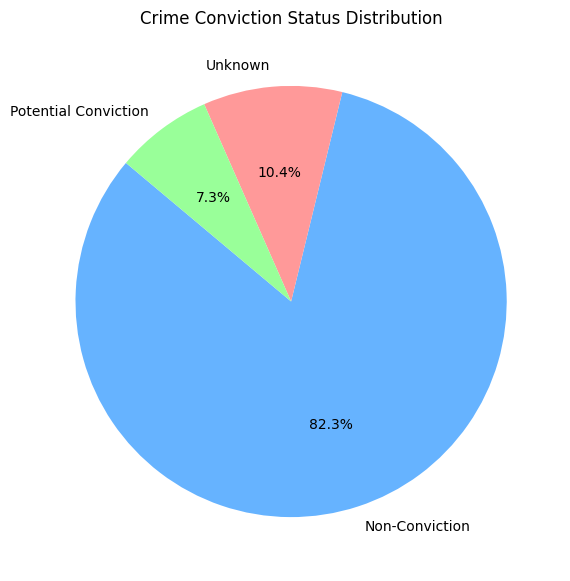

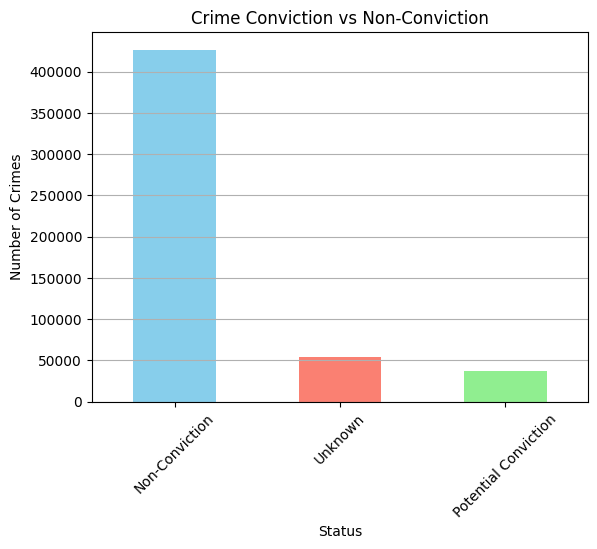

In [8]:
# Looking at conviction rates for crime 

import pandas as pd

# Load the data
df = pd.read_csv("EssexCrimeData22-24.csv")
#print the column unique values
print("Unique Last Outcome Categories:\n", df['Last outcome category'].unique())

# === Basic Counts of Outcomes ===
outcome_counts = df['Last outcome category'].value_counts(dropna=False)
print("\nOutcome Counts:\n", outcome_counts)

# === Identify Conviction-Related Outcomes ===
# Adjust this list depending on the specific wording in your dataset
conviction_keywords = [
    "Offender given a caution",
    "Offender given a drugs possession warning",
    "Suspect charged",
    "Awaiting court outcome",
    "Court result unavailable"    
]

# Create a new column: Convicted vs Not Convicted
def classify_outcome(outcome):
    if pd.isnull(outcome):
        return "Unknown"
    if any(keyword in outcome for keyword in conviction_keywords):
        return "Potential Conviction"
    else:
        return "Non-Conviction"

df['Conviction Status'] = df['Last outcome category'].apply(classify_outcome)

# === Group and Visualize ===
conviction_summary = df['Conviction Status'].value_counts()
print("\nConviction Status Summary:\n", conviction_summary)

# === Pie Chart ===
colors = ['#66b3ff','#ff9999','#99ff99']
plt.figure(figsize=(7,7))
plt.pie(conviction_summary, labels=conviction_summary.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title("Crime Conviction Status Distribution")
plt.show()

# === Bar Chart ===
conviction_summary.plot(kind='bar', color=['skyblue', 'salmon', 'lightgreen'])
plt.title("Crime Conviction vs Non-Conviction")
plt.xlabel("Status")
plt.ylabel("Number of Crimes")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


# 5. Time-Series Forecasting
Model seasonal trends in crimes (e.g., shoplifting) using SARIMA.

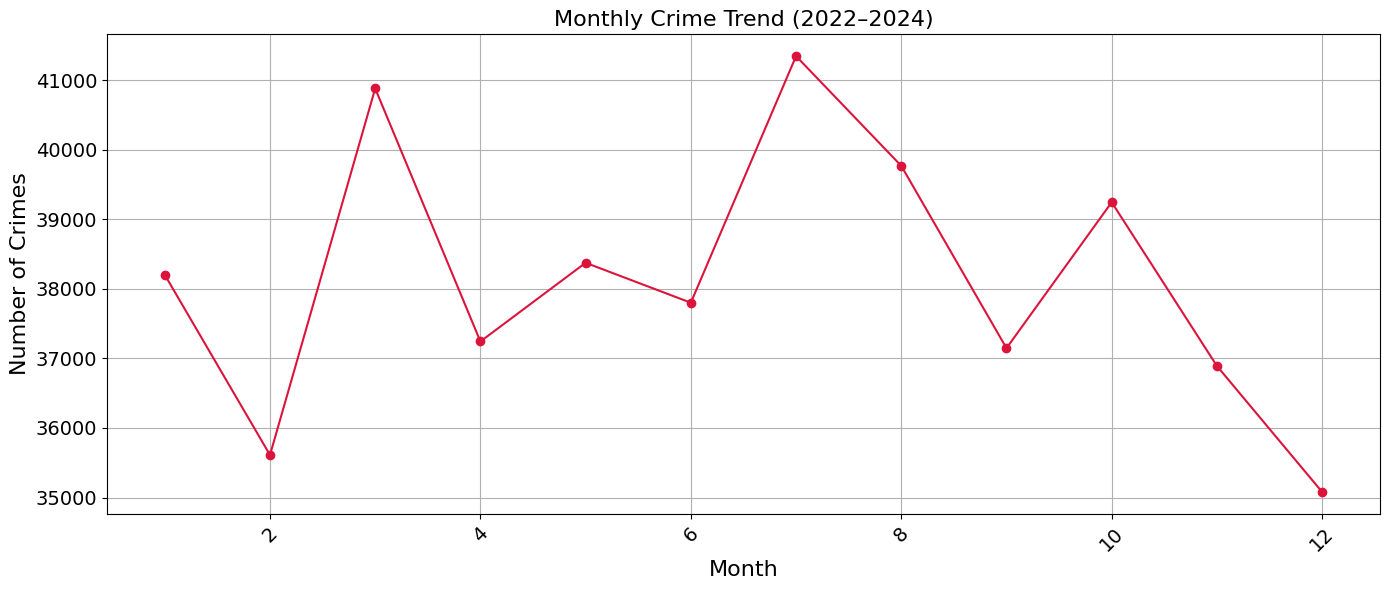

📊 Yearly % Change in All Crime Types:



Crime type,Anti-social behaviour,Bicycle theft,Burglary,Criminal damage and arson,Drugs,Other crime,Other theft,Possession of weapons,Public order,Robbery,Shoplifting,Theft from the person,Vehicle crime,Violence and sexual offences,All Crime
Year,,,,,,,,,,,,,,,
2022,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%
2023,-39.7%,-3.7%,9.7%,-9.0%,4.3%,-2.8%,2.9%,14.9%,-21.5%,4.5%,26.2%,-7.8%,11.8%,-11.3%,-9.7%
2024,-3.8%,-20.0%,-13.7%,-8.5%,-0.1%,8.9%,-15.2%,-10.2%,-15.9%,-13.2%,12.1%,2.5%,-12.9%,-9.6%,-8.3%


In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("EssexCrimeData22-24_filtered.csv")

# Convert date column to datetime
df["Month"] = pd.to_datetime(df["Month"], format="%Y-%m")

# Extract Month for further analysis
df["Month_only"] = df["Month"].dt.month

# Monthly trend of all crimes
monthly_trend = df.groupby("Month_only")["Crime ID"].count()

plt.figure(figsize=(14,6))
plt.plot(monthly_trend.index, monthly_trend.values, marker="o", linestyle="-", color="crimson")
plt.title("Monthly Crime Trend (2022–2024)", fontsize=16)
plt.xlabel("Month", fontsize=16)
plt.ylabel("Number of Crimes", fontsize=16)
plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)
plt.grid()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#Crime % Change year on year by district 

# Group by Year and Crime type
yearly_crime = df.groupby(["Year", "Crime type"])["Latitude"].count().reset_index()

# Pivot table: years as rows, crime types as columns
pivot_table = yearly_crime.pivot(index="Year", columns="Crime type", values="Latitude").fillna(0)

# Add 'All Crime' column as the total across all crime types
pivot_table["All Crime"] = pivot_table.sum(axis=1)

# Calculate % change year-on-year
pct_change_table = pivot_table.pct_change().fillna(0) * 100
pct_change_table = pct_change_table.round(2)

# Highlight positive (green) and negative (red) changes
styled_tableALL = pct_change_table.style\
    .set_table_styles(
        [{"selector": "td, th", "props": [("font-size", "14px")]}]
    )\
    .background_gradient(cmap="RdYlGn_r", axis=None)\
    .format("{:.1f}%")


# Display result
print("📊 Yearly % Change in All Crime Types:\n")
styled_tableALL


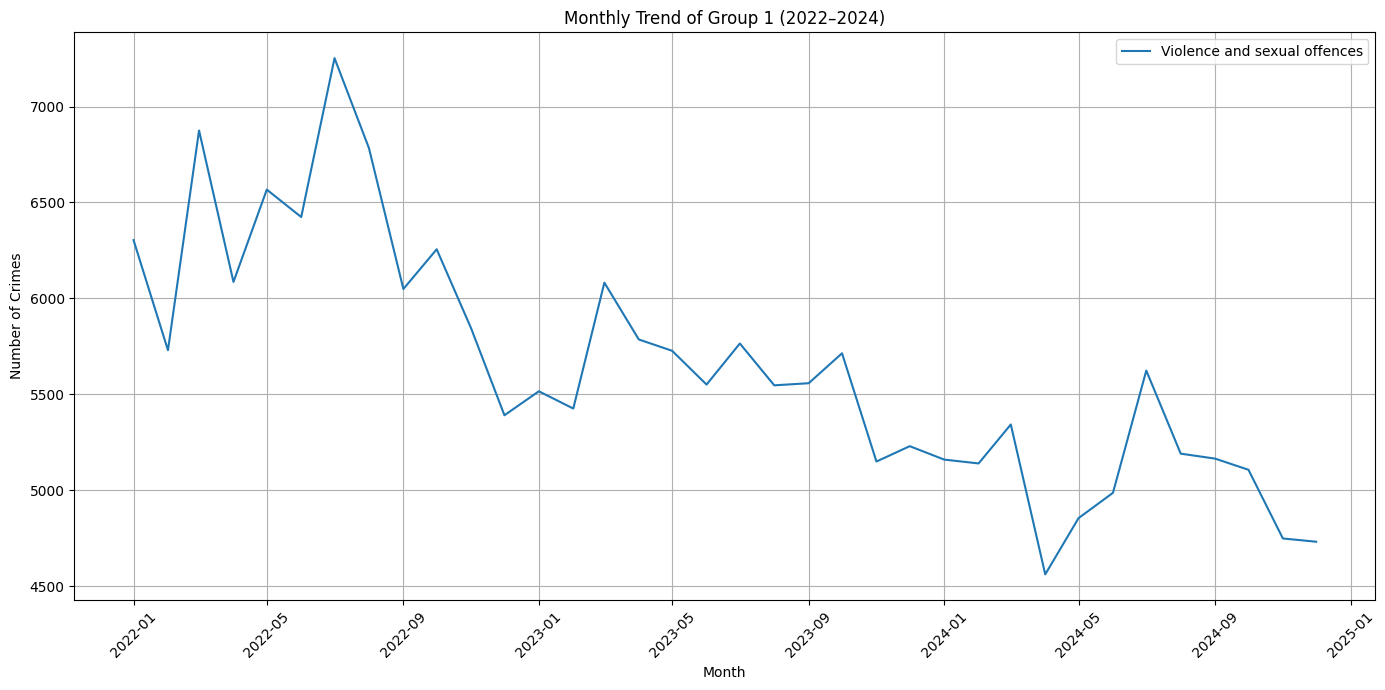

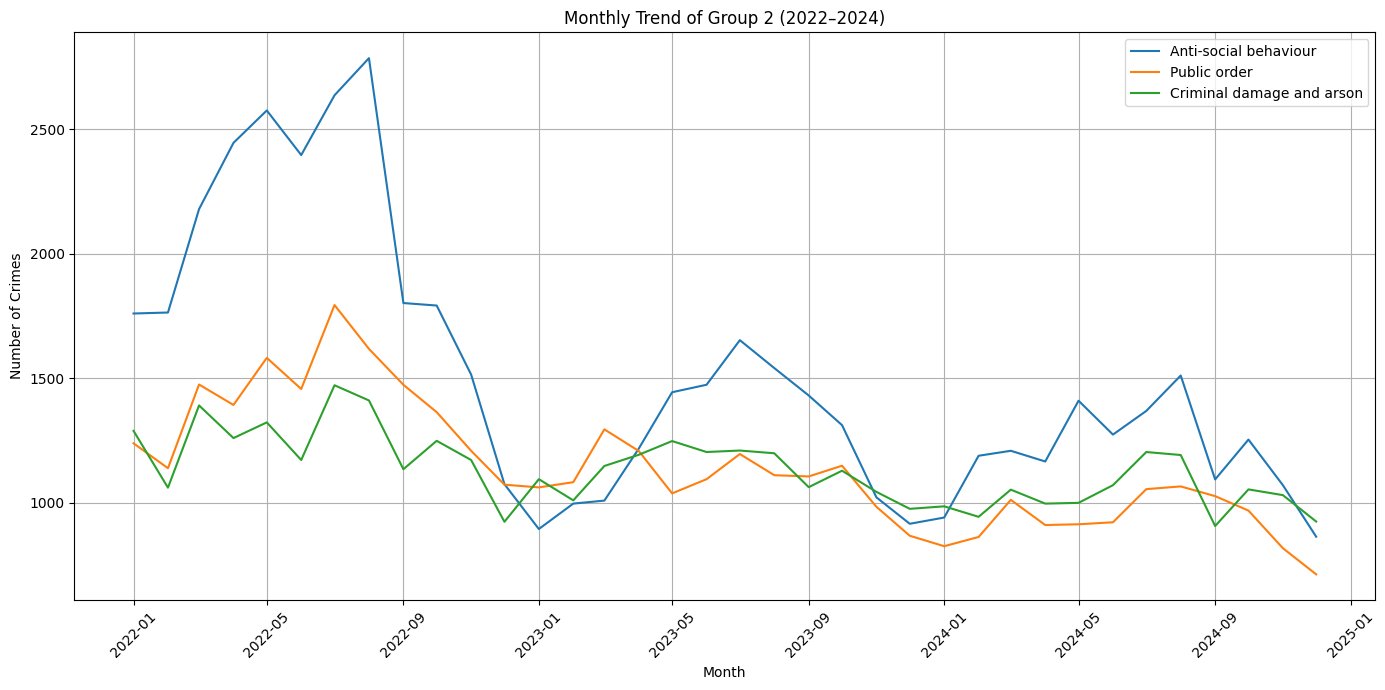

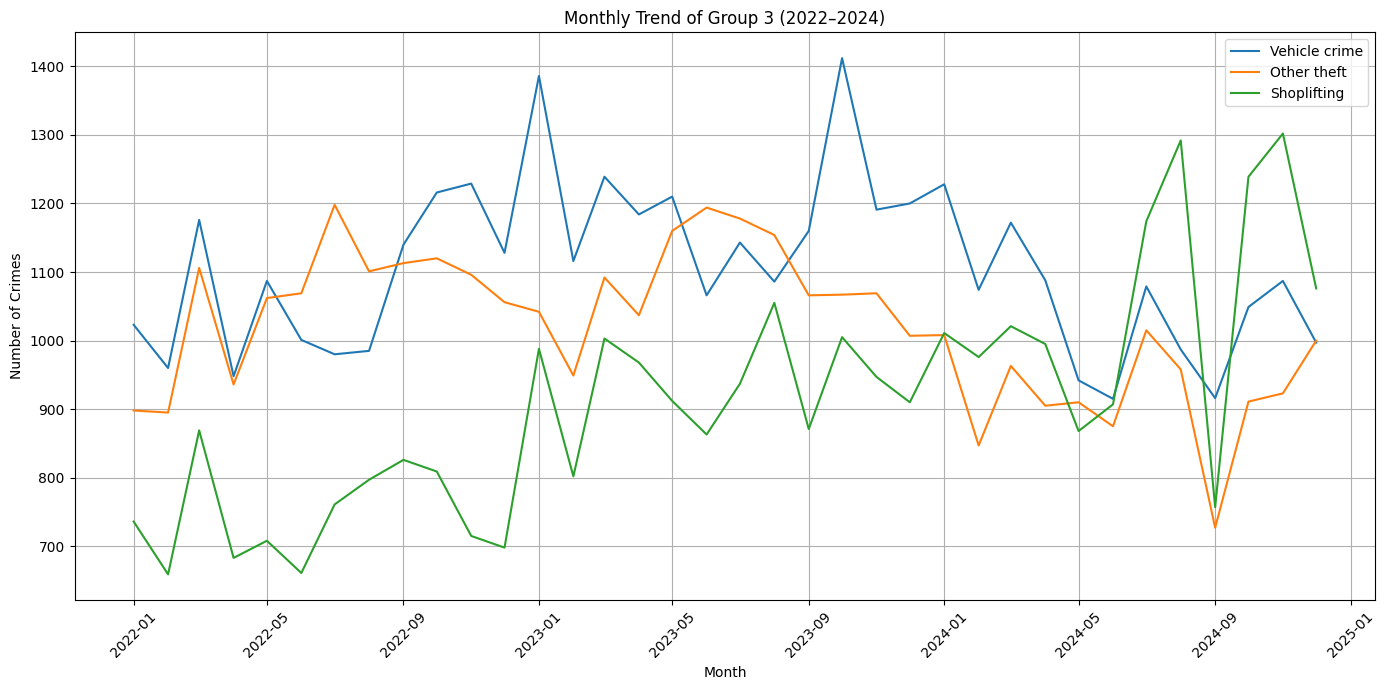

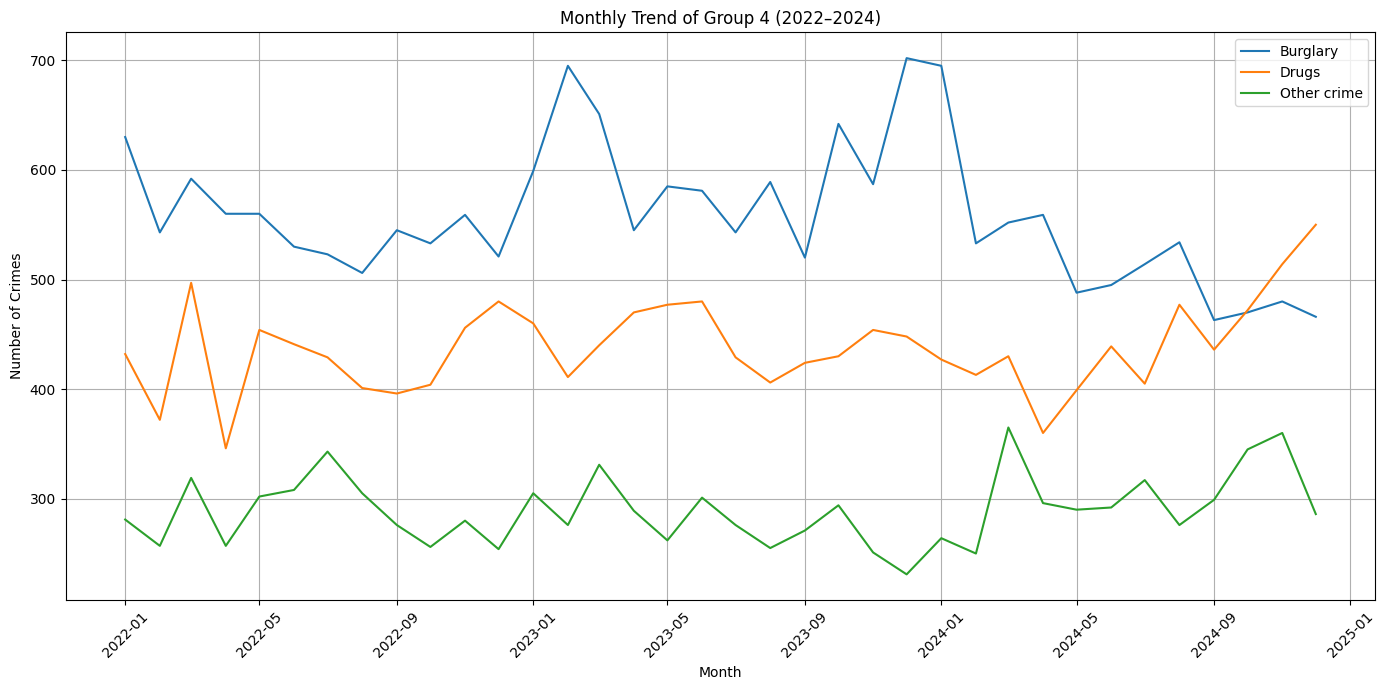

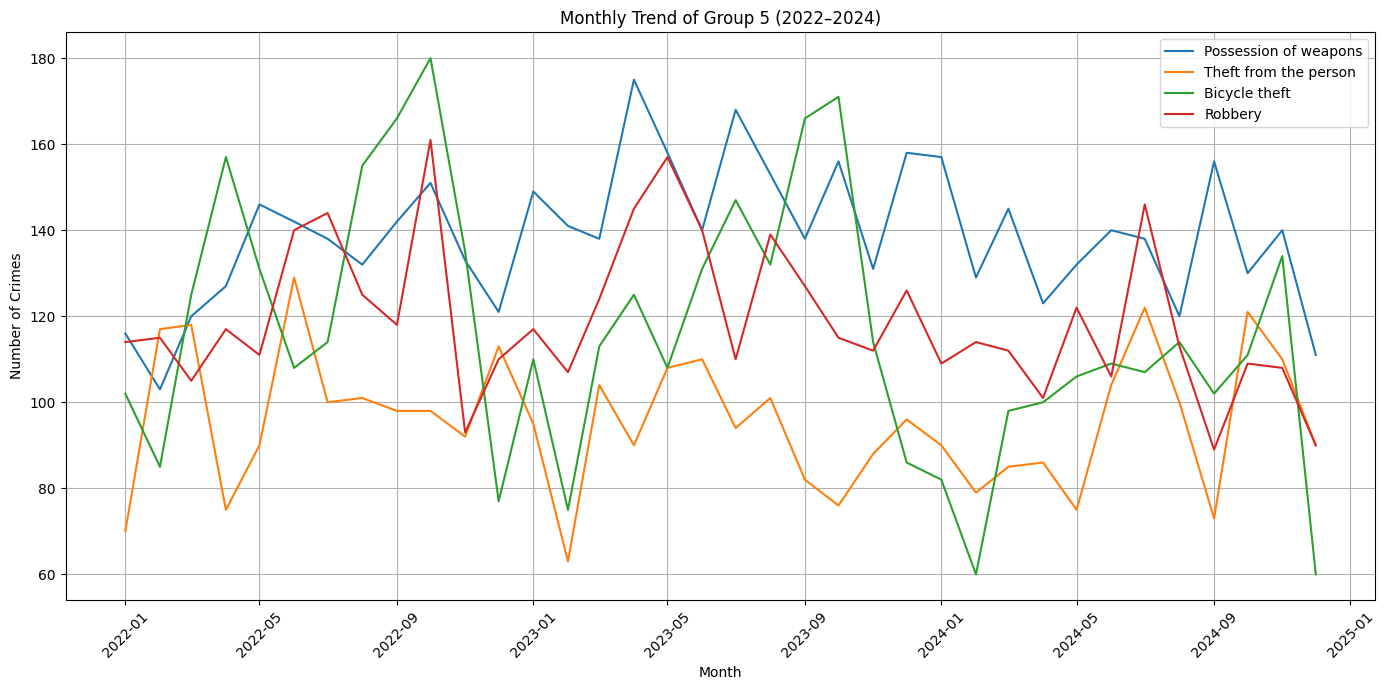

📊 Yearly % Change in All Crime Types and districts:



In [30]:
#EDA Trend analysis by crime type
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("EssexCrimeData22-24_filtered.csv")

# Convert date column to datetime
df["Month"] = pd.to_datetime(df["Month"], format="%Y-%m")

# Extract Month for further analysis
df["Month_only"] = df["Month"].dt.month

###########################

# Define crime type groups
crime_groups = {
    "Group 1": [
        "Violence and sexual offences"
    ],
    "Group 2": [
        "Anti-social behaviour",
        "Public order",
        "Criminal damage and arson"
    ],
    "Group 3": [
        "Vehicle crime",
        "Other theft",
        "Shoplifting"
    ],
    "Group 4": [
        "Burglary",
        "Drugs",
        "Other crime"
    ],
    "Group 5":[
        "Possession of weapons",
        "Theft from the person",
        "Bicycle theft",
        "Robbery"
    ]
}

# Loop through each group and create a graph
for group_name, crime_list in crime_groups.items():
    df_group = df[df["Crime type"].isin(crime_list)]
    grouped = df_group.groupby(["Month", "Crime type"])["Latitude"].count().reset_index()
    pivot = grouped.pivot(index="Month", columns="Crime type", values="Latitude").fillna(0)
    
    # Plotting
    plt.figure(figsize=(14, 7))
    for crime in crime_list:
        if crime in pivot.columns:
            plt.plot(pivot.index, pivot[crime], label=crime)

    plt.title(f"Monthly Trend of {group_name} (2022–2024)")
    plt.xlabel("Month")
    plt.ylabel("Number of Crimes")
    plt.legend()
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()
#########################################



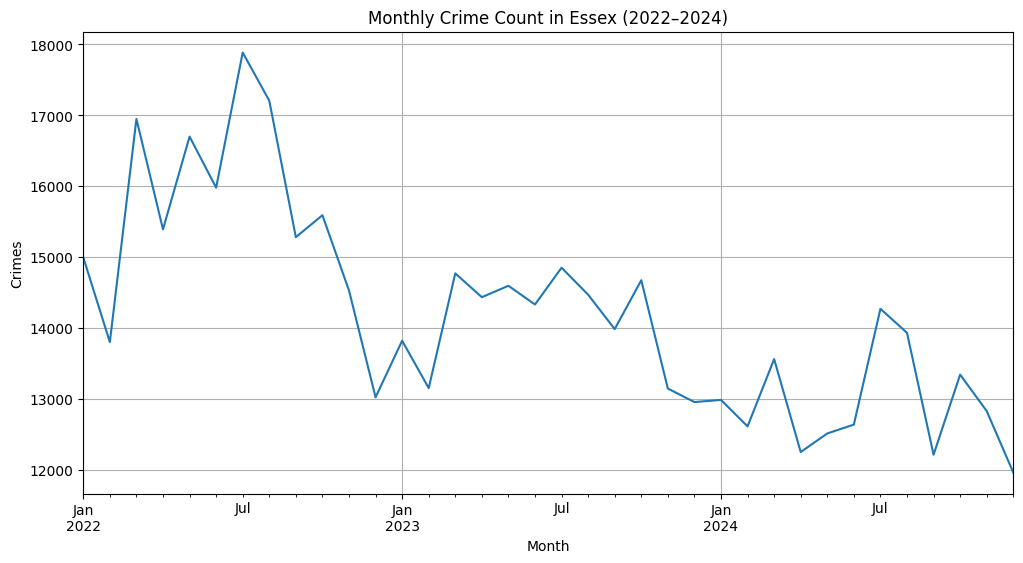


📉 Augmented Dickey-Fuller Test on Original Series:
ADF Statistic: -2.1997
p-value: 0.2064
Critical Value (1%): -3.6327
Critical Value (5%): -2.9485
Critical Value (10%): -2.6130


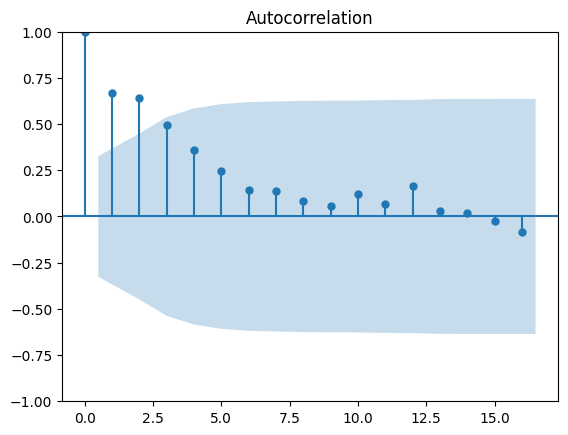

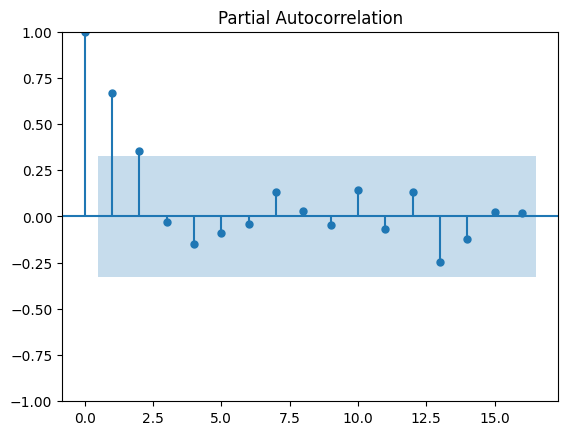

                                     SARIMAX Results                                      
Dep. Variable:                        Crime Count   No. Observations:                   36
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                 -67.892
Date:                            Wed, 16 Apr 2025   AIC                            145.784
Time:                                    22:20:36   BIC                            146.771
Sample:                                01-01-2022   HQIC                           143.656
                                     - 12-01-2024                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5914      1.619      0.365      0.715      -2.582       3.765
ma.L1         -0.5211      2.140   

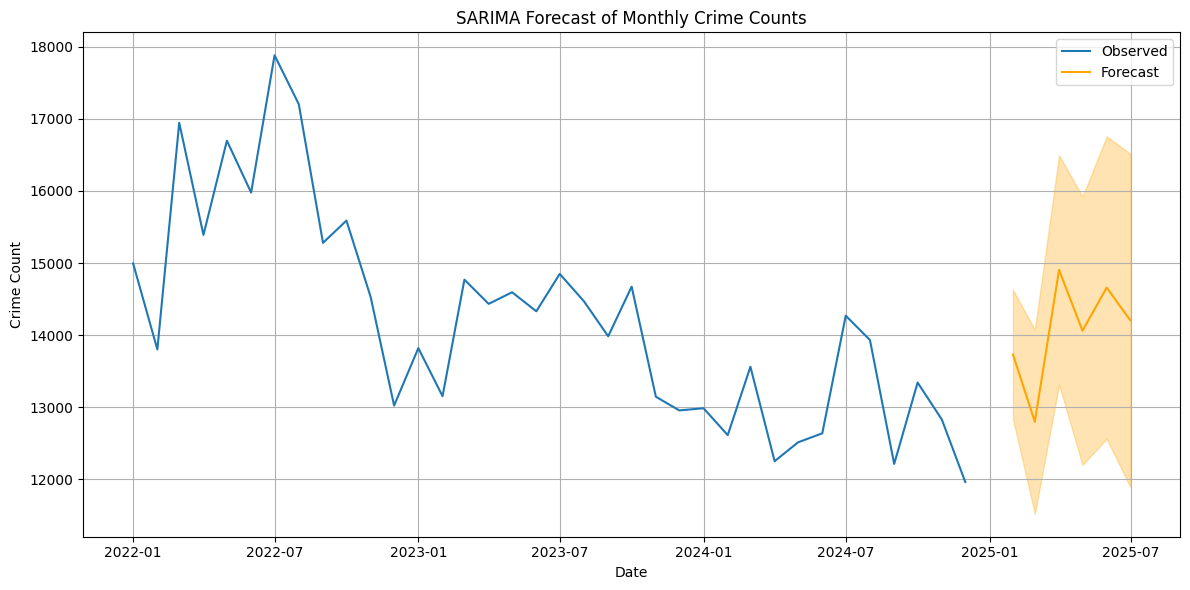

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pandas.plotting import register_matplotlib_converters
from statsmodels.tsa.stattools import adfuller  # <-- Added
import warnings

warnings.filterwarnings("ignore")
register_matplotlib_converters()

# Load data
df = pd.read_csv("EssexCrimeData22-24_filtered.csv")

# Ensure proper datetime format
df['Month'] = pd.to_datetime(df['Month'])

# Group by Month to get total crime count
monthly_crime = df.groupby(df['Month'].dt.to_period('M')).size().reset_index(name='Crime Count')
monthly_crime['Month'] = monthly_crime['Month'].dt.to_timestamp()
monthly_crime.set_index('Month', inplace=True)

# Plot original time series
plt.figure(figsize=(12, 6))
monthly_crime['Crime Count'].plot(title='Monthly Crime Count in Essex (2022–2024)', ylabel='Crimes')
plt.grid()
plt.show()

# -------------------------------
# Stationarity Check (ADF Test)
# -------------------------------
print("\n📉 Augmented Dickey-Fuller Test on Original Series:")
adf_result = adfuller(monthly_crime['Crime Count'])
print(f"ADF Statistic: {adf_result[0]:.4f}")
print(f"p-value: {adf_result[1]:.4f}")
for key, value in adf_result[4].items():
    print(f"Critical Value ({key}): {value:.4f}")

# ACF and PACF to guide model order selection
plot_acf(monthly_crime['Crime Count'])
plt.show()

plot_pacf(monthly_crime['Crime Count'])
plt.show()

# Fit SARIMA model — seasonal_order=(P, D, Q, s)
model = SARIMAX(
    monthly_crime['Crime Count'],
    order=(1, 1, 1),                # Non-seasonal ARIMA terms
    seasonal_order=(1, 1, 1, 12),   # Seasonal ARIMA terms
    enforce_stationarity=False,
    enforce_invertibility=False
)
model_fit = model.fit()

# Print model summary
print(model_fit.summary())

# Forecast the next 6 months
forecast_steps = 6
forecast = model_fit.get_forecast(steps=forecast_steps)
forecast_index = pd.date_range(start=monthly_crime.index[-1] + pd.DateOffset(months=1), periods=forecast_steps, freq='M')
forecast_df = forecast.summary_frame()
forecast_df.index = forecast_index

# Plot actual and forecasted values
plt.figure(figsize=(12, 6))
plt.plot(monthly_crime.index, monthly_crime['Crime Count'], label='Observed')
plt.plot(forecast_df.index, forecast_df['mean'], label='Forecast', color='orange')
plt.fill_between(forecast_df.index, forecast_df['mean_ci_lower'], forecast_df['mean_ci_upper'], color='orange', alpha=0.3)
plt.title('SARIMA Forecast of Monthly Crime Counts')
plt.xlabel('Date')
plt.ylabel('Crime Count')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()



# 6. Machine Learning Models
Apply regression or classification models to predict crime based on socio-economic and temporal features.

In [1]:
# Mapping crime by grouping by LSOA to show some heat spots

import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import folium
from folium.features import GeoJsonTooltip
from folium.plugins import HeatMap
from IPython.display import display, IFrame

# Load shapefile
shapefile_path = "Shapefiles/Greater Essex 2021 LSOA boundaries.shp"
lsoa_gdf = gpd.read_file(shapefile_path)

# Load crime data
crime_df = pd.read_csv("EssexCrimeData22-24_filtered.csv")

# Aggregate crime counts by LSOA
lsoa_crime_counts = crime_df.groupby("LSOA code").size().reset_index(name="Crime Count")

# Merge crime data into the GeoDataFrame
lsoa_gdf = lsoa_gdf.merge(lsoa_crime_counts, left_on="LSOA21CD", right_on="LSOA code", how="left")
lsoa_gdf["Crime Count"] = lsoa_gdf["Crime Count"].fillna(0)

# -------------------------
# Interactive Map with Folium
# -------------------------
# Ensure correct coordinate reference system (CRS)
lsoa_gdf = lsoa_gdf.to_crs(epsg=4326)  

# Create folium map centered on Essex
m = folium.Map(location=[51.8, 0.6], zoom_start=9, tiles="cartodbpositron")

# Convert GeoDataFrame to GeoJSON
geojson_data = lsoa_gdf.to_json()

# Add Choropleth layer
choropleth = folium.Choropleth(
    geo_data=geojson_data,
    data=lsoa_gdf,
    columns=["LSOA21CD", "Crime Count"],
    key_on="feature.properties.LSOA21CD",
    fill_color="OrRd",
    bins=[0, 250, 500, 7000], #bins for crime to make sure red stands out
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Number of Crimes",
    highlight=True
).add_to(m)

# Add tooltips
tooltip = GeoJsonTooltip(
    fields=["LSOA21CD", "Crime Count"],
    aliases=["LSOA Code:", "Crime Count:"],
    localize=True,
    labels=True,
    sticky=True
)
choropleth.geojson.add_child(tooltip)

# Save map to HTML file
m.save("interactive_essex_lsoa_crime_map.html")
print("Interactive crime map saved as 'interactive_essex_lsoa_crime_map.html'")
display(IFrame("interactive_essex_lsoa_crime_map.html", width=800, height=600))


✅ Interactive crime map saved as 'interactive_essex_lsoa_crime_map.html'


### Merging deprivation data with original filtered dataset for regression

C:\Users\chris\AppData\Roaming\Python\Python311\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  res = hypotest_fun_out(*samples, **kwds)


                            OLS Regression Results                            
Dep. Variable:            Crime Count   R-squared:                       0.470
Model:                            OLS   Adj. R-squared:                  0.403
Method:                 Least Squares   F-statistic:                     7.081
Date:                Tue, 15 Apr 2025   Prob (F-statistic):             0.0288
Time:                        16:54:36   Log-Likelihood:                -106.26
No. Observations:                  10   AIC:                             216.5
Df Residuals:                       8   BIC:                             217.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.653e+04   7613.050      8.740      0.0

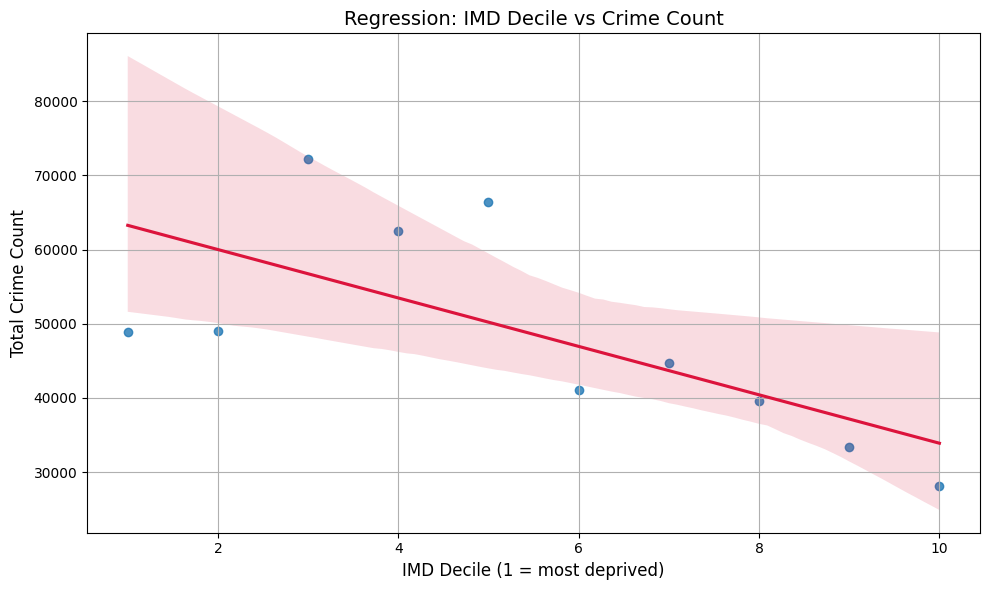

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Load your main crime dataset
crime_df = pd.read_csv("EssexCrimeData22-24_filtered.csv")

# Load lookup tables
lookup_df1 = pd.read_csv("Deprivation data/LSOA2011 to LSOA2021.csv") 
lookup_df2 = pd.read_csv("Deprivation data/IMD Scores.csv")  

# Merge on the LSOA code columns
crime_df = crime_df.merge(lookup_df1, how="left", left_on="LSOA code", right_on="LSOA21CD")
crime_df = crime_df.merge(lookup_df2, how="left", left_on="LSOA11CD", right_on="LSOA code (2011)")

# Rename the long IMD column to 'IMD decile' for simplicity
crime_df = crime_df.rename(columns={
    "Index of Multiple Deprivation (IMD) Decile (where 1 is most deprived 10% of LSOAs)": "IMD decile"
})

# Group by IMD decile and count crimes
imd_crime = crime_df.groupby("IMD decile").size().reset_index(name="Crime Count")

# Drop missing or invalid deciles
imd_crime = imd_crime.dropna(subset=["IMD decile"])
imd_crime = imd_crime[imd_crime["IMD decile"] > 0]

# Prepare regression
X = imd_crime["IMD decile"]
y = imd_crime["Crime Count"]
X = sm.add_constant(X)

# Fit and summarize model
model = sm.OLS(y, X).fit()
print(model.summary())

# Plot regression
plt.figure(figsize=(10,6))
sns.regplot(data=imd_crime, x="IMD decile", y="Crime Count", line_kws={"color": "crimson"})
plt.title("Regression: IMD Decile vs Crime Count", fontsize=14)
plt.xlabel("IMD Decile (1 = most deprived)", fontsize=12)
plt.ylabel("Total Crime Count", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


# 7. Clustering and Hotspot Detection
Using KMeans and DBSCAN to identify crime hotspots across Essex districts.

In [3]:
import pandas as pd
import folium
import matplotlib.pyplot as plt
from folium.plugins import HeatMap
from IPython.display import display, IFrame


def mapping_crime_folium(csv_file):
    # Loading and cleaning data in dataframe
    df = pd.read_csv(csv_file)
    df = df.dropna(subset=["Longitude", "Latitude", "Crime type"])  # Remove missing values
    df["Longitude"] = df["Longitude"].astype(float)
    df["Latitude"] = df["Latitude"].astype(float)
    df["Month"] = pd.to_datetime(df["Month"], format="%Y-%m")  # Convert Month to datetime format
    
    # HTML Heat map for crimes 2022-2024
    m = folium.Map(location=[df["Latitude"].mean(), df["Longitude"].mean()], zoom_start=10)
    heat_data = list(zip(df["Latitude"], df["Longitude"]))
    HeatMap(heat_data).add_to(m)

    heatmap_file = "crime_hotspots_map.html"
    m.save(heatmap_file)
    print(f"🔥 Crime hotspot heatmap saved as {heatmap_file}")
    display(IFrame(heatmap_file, width=800, height=600)) #Code to force open another tab to show the map

# Functions to run
mapping_crime_folium("EssexCrimeData22-24_filtered.csv")


🔥 Crime hotspot heatmap saved as crime_hotspots_map.html


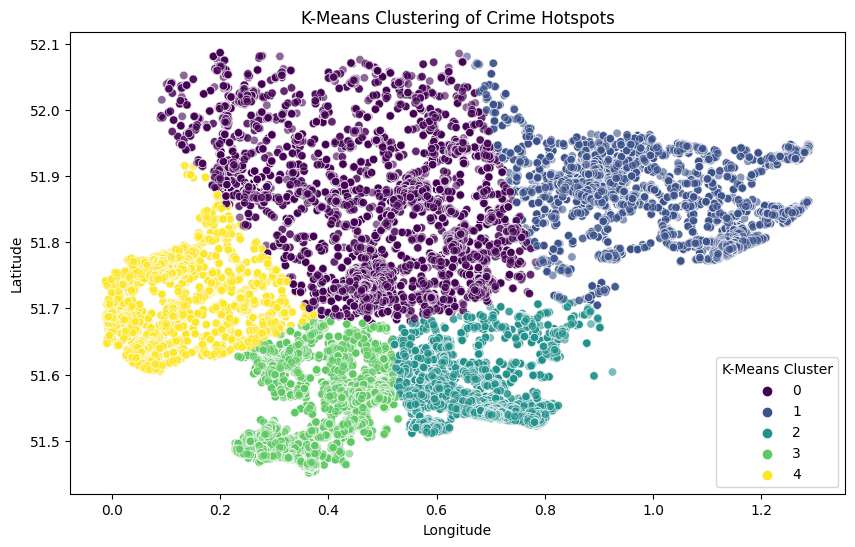

Number of outliers detected by DBSCAN: 3217
Number of large DBSCAN clusters detected (≥100 points): 299


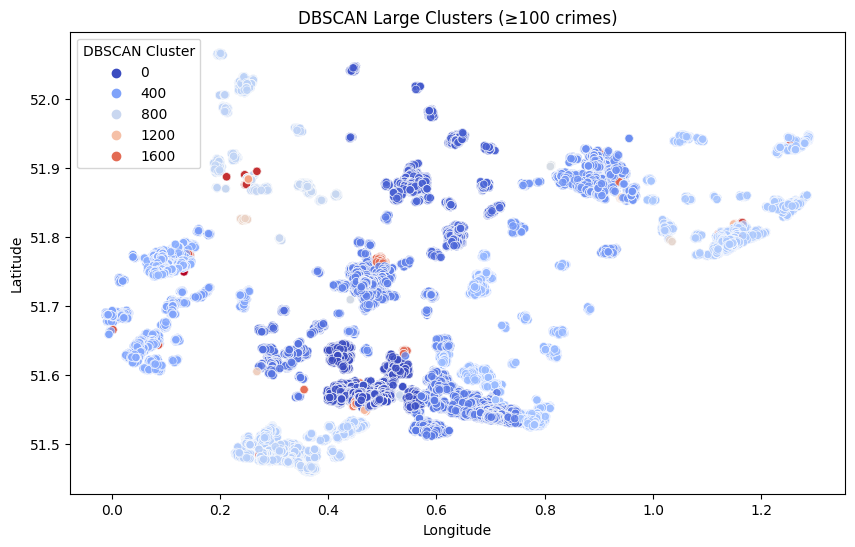

In [ ]:
import pandas as pd
import numpy as np
import folium
from folium.plugins import MarkerCluster
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from folium.plugins import HeatMap
from IPython.display import display, IFrame

def identify_crime_hotspots(csv_file, num_clusters=5, dbscan_eps=0.01, dbscan_min_samples=5, dbscan_min_cluster_size=100):
    """
    Identifies crime hotspots using K-Means and DBSCAN clustering, and visualizes them on an interactive map.
    
    Parameters:
    - csv_file (str): Path to the crime dataset CSV file.
    - num_clusters (int): Number of clusters for K-Means (default: 5).
    - dbscan_eps (float): Epsilon value for DBSCAN clustering (default: 0.01).
    - dbscan_min_samples (int): Minimum samples for DBSCAN clustering (default: 5).
    - dbscan_min_cluster_size (int): Minimum points required in DBSCAN cluster to visualize (default: 100).
    
    Outputs:
    - Displays scatter plots for K-Means and DBSCAN large clusters
    - Saves an interactive crime cluster map
    """

    # Load and clean dataset
    df = pd.read_csv(csv_file)
    df = df.dropna(subset=["Longitude", "Latitude"])
    df["Longitude"] = df["Longitude"].astype(float)
    df["Latitude"] = df["Latitude"].astype(float)

    # Extract location features
    crime_locations = df[["Longitude", "Latitude"]].values

    # Standardize the data for clustering
    scaler = StandardScaler()
    crime_scaled = scaler.fit_transform(crime_locations)

    # ---- Step 1: K-Means Clustering ----
    kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
    df["KMeans_Cluster"] = kmeans.fit_predict(crime_scaled)

    # Visualizing K-Means Clusters
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=df["Longitude"], y=df["Latitude"], hue=df["KMeans_Cluster"], palette="viridis", alpha=0.6)
    plt.title("K-Means Clustering of Crime Hotspots")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.legend(title="K-Means Cluster")
    plt.show()

    # ---- Step 2: DBSCAN Clustering ----
    dbscan = DBSCAN(eps=dbscan_eps, min_samples=dbscan_min_samples)
    df["DBSCAN_Cluster"] = dbscan.fit_predict(crime_scaled)

    # Count number of outliers (-1 is DBSCAN's outlier label)
    outliers = df[df["DBSCAN_Cluster"] == -1]
    print(f"Number of outliers detected by DBSCAN: {len(outliers)}")

    # Filter out noise and only keep large clusters
    df_dbscan_clusters = df[df["DBSCAN_Cluster"] != -1]
    cluster_counts = df_dbscan_clusters["DBSCAN_Cluster"].value_counts()
    large_clusters = cluster_counts[cluster_counts >= dbscan_min_cluster_size].index
    df_large_clusters = df_dbscan_clusters[df_dbscan_clusters["DBSCAN_Cluster"].isin(large_clusters)]

    print(f"Number of large DBSCAN clusters detected (≥{dbscan_min_cluster_size} points): {len(large_clusters)}")

    # Visualizing Only Large DBSCAN Clusters
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=df_large_clusters["Longitude"], y=df_large_clusters["Latitude"], hue=df_large_clusters["DBSCAN_Cluster"], palette="coolwarm", alpha=0.8)
    plt.title(f"DBSCAN Large Clusters (≥{dbscan_min_cluster_size} crimes)")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.legend(title="DBSCAN Cluster")
    plt.show()

    # ---- Step 3: Geo-Spatial Analysis with Folium ----
    crime_map = folium.Map(location=[df["Latitude"].mean(), df["Longitude"].mean()], zoom_start=10)
    marker_cluster = MarkerCluster().add_to(crime_map)

    for _, row in df.iterrows():
        folium.Marker(
            location=[row["Latitude"], row["Longitude"]],
            popup=f"Crime Type: {row['Crime type']}\nK-Means Cluster: {row['KMeans_Cluster']}",
            icon=folium.Icon(color="blue" if row["KMeans_Cluster"] == 0 else "red")
        ).add_to(marker_cluster)

    # Save and display map
    map_filename = "crime_clusters_map.html"
    crime_map.save(map_filename)
    print(f"Crime cluster map saved as {map_filename}")
    display(IFrame(map_filename, width=800, height=600))

# feed csv file through the function
identify_crime_hotspots("EssexCrimeData22-24_filtered.csv")


Filtered to 155090 crimes in 2024


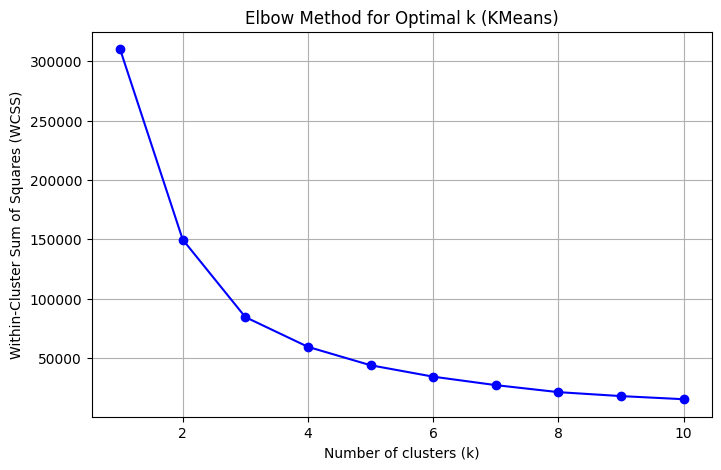

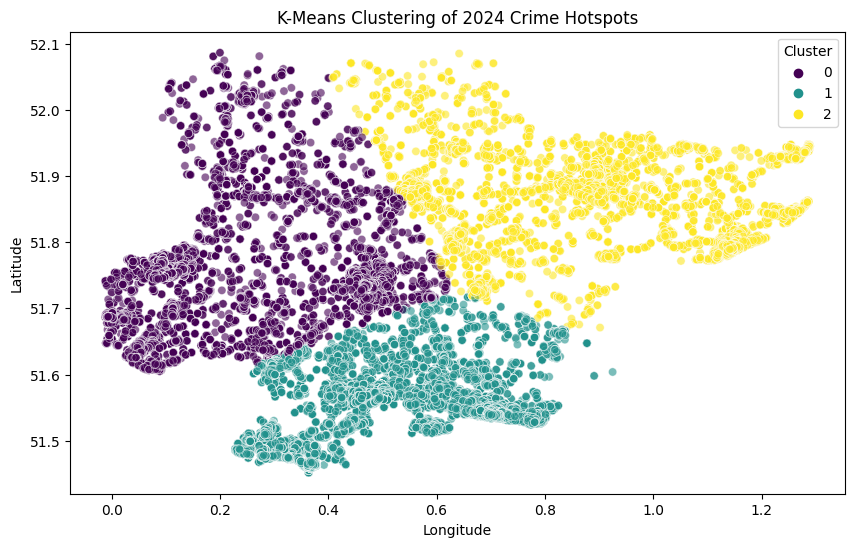

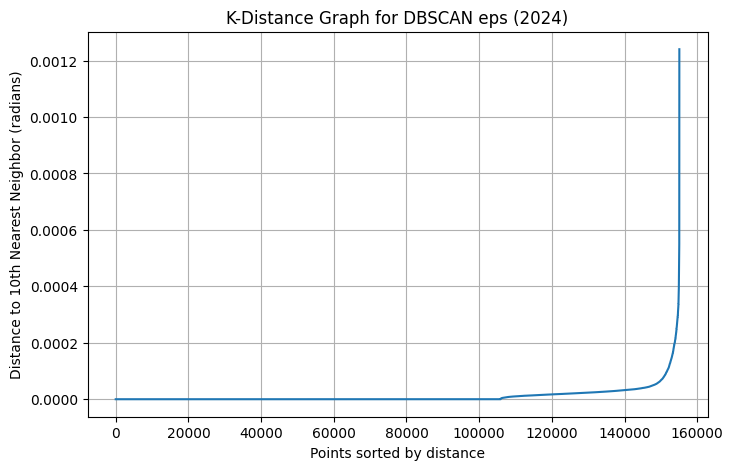


Filtered to 151343 points in 47 large clusters (≥100 crimes)


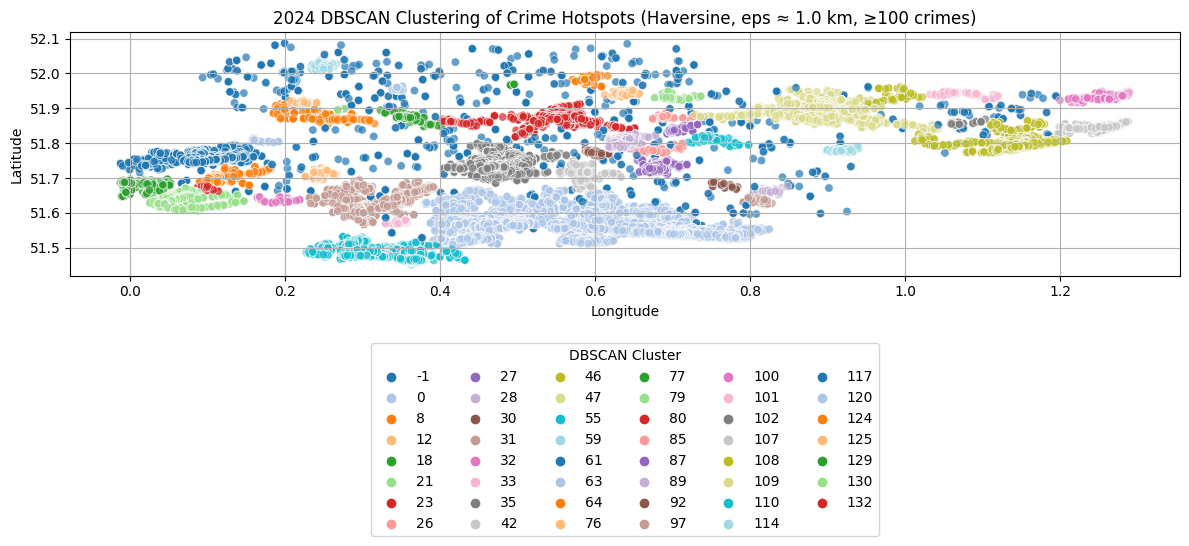

Interactive cluster crime map saved as 'dbscan_2024_cluster_map.html'


C:\Users\chris\AppData\Local\Temp\ipykernel_7340\3648114241.py:147: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('tab20', len(unique_clusters))


In [6]:
import pandas as pd
import numpy as np
import folium
from folium.plugins import MarkerCluster
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, IFrame

# Parameters
# ---------------------------
csv_file = "EssexCrimeData22-24_filtered.csv"
num_clusters = 3             # Based on elbow plot
dbscan_min_samples = 10       

# ---------------------------
# Step 1: Load and Clean Data
# ---------------------------
df = pd.read_csv("EssexCrimeData22-24_filtered.csv")
df = df.dropna(subset=["Longitude", "Latitude", "Month"])
df["Longitude"] = df["Longitude"].astype(float)
df["Latitude"] = df["Latitude"].astype(float)
df["Month"] = pd.to_datetime(df["Month"], errors='coerce')

# Filter only 2024 crime data
df = df[df["Month"].dt.year == 2024].copy()
print(f"Filtered to {len(df)} crimes in 2024")

# ---------------------------
# Step 2: Standardize Location Data (for KMeans)
# ---------------------------
crime_locations = df[["Longitude", "Latitude"]].values
scaler = StandardScaler()
crime_scaled = scaler.fit_transform(crime_locations)

# ---------------------------
# Step 3: Elbow Method for Optimal k (KMeans)
# ---------------------------
wcss = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(crime_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_range, wcss, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Optimal k (KMeans)')
plt.grid(True)
plt.show()

# ---------------------------
# Step 4: K-Means Clustering
# ---------------------------
kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
df["KMeans_Cluster"] = kmeans.fit_predict(crime_scaled)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df["Longitude"], y=df["Latitude"], hue=df["KMeans_Cluster"], palette="viridis", alpha=0.6)
plt.title("K-Means Clustering of 2024 Crime Hotspots")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(title="Cluster")
plt.show()

# ---------------------------
# Step 5: DBSCAN - Find Optimal eps via K-Distance Graph
# ---------------------------
k = dbscan_min_samples
nn = NearestNeighbors(n_neighbors=k)
coords_rad = np.radians(df[["Latitude", "Longitude"]].values)
nn.fit(coords_rad)
distances, _ = nn.kneighbors(coords_rad)
k_distances = np.sort(distances[:, k - 1])

plt.figure(figsize=(8, 5))
plt.plot(k_distances)
plt.title("K-Distance Graph for DBSCAN eps (2024)")
plt.xlabel("Points sorted by distance")
plt.ylabel(f"Distance to {k}th Nearest Neighbor (radians)")
plt.grid(True)
plt.show()

# ---------------------------
# Step 6: DBSCAN Clustering (eps ≈ 1.0 km, min cluster size ≥ 100)
# ---------------------------

from sklearn.cluster import DBSCAN

# Convert coordinates to radians
coords_rad = np.radians(df[["Latitude", "Longitude"]].values)
eps = 0.00015  # radians (~1.0 km)

# Run DBSCAN
dbscan = DBSCAN(eps=eps, min_samples=dbscan_min_samples, metric="haversine")
df["DBSCAN_Cluster"] = dbscan.fit_predict(coords_rad)

# Filter to large clusters only (≥100 crimes)
cluster_sizes = df["DBSCAN_Cluster"].value_counts()
large_clusters = cluster_sizes[cluster_sizes >= 100].index
df_filtered = df[df["DBSCAN_Cluster"].isin(large_clusters)]

print(f"\nFiltered to {len(df_filtered)} points in {len(large_clusters)} large clusters (≥100 crimes)")

# Plot
plt.figure(figsize=(12, 7))
sns.scatterplot(
    x=df_filtered["Longitude"],
    y=df_filtered["Latitude"],
    hue=df_filtered["DBSCAN_Cluster"],
    palette="tab20",
    alpha=0.7
)

# Move the legend below the plot
plt.legend(
    title="DBSCAN Cluster",
    bbox_to_anchor=(0.5, -0.25),
    loc="upper center",
    ncol=6,
    frameon=True
)
plt.title("2024 DBSCAN Clustering of Crime Hotspots (Haversine, eps ≈ 1.0 km, ≥100 crimes)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.tight_layout(rect=[0, 0.1, 1, 1])  # leave room for legend below
plt.grid(True)
plt.show()

# ---------------------------
# Step 7: Interactive Folium Map of 2024 DBSCAN Clusters
# ---------------------------

print("Interactive cluster crime map saved as 'dbscan_2024_cluster_map.html'")

import matplotlib.cm as cm
import matplotlib.colors as mcolors

map_center = [df_filtered["Latitude"].mean(), df_filtered["Longitude"].mean()]
crime_map = folium.Map(location=map_center, zoom_start=10)

unique_clusters = sorted(df_filtered["DBSCAN_Cluster"].unique())
cmap = cm.get_cmap('tab20', len(unique_clusters))
cluster_color_map = {
    cluster_id: mcolors.to_hex(cmap(i))
    for i, cluster_id in enumerate(unique_clusters)
}

marker_cluster = MarkerCluster().add_to(crime_map)

for _, row in df_filtered.iterrows():
    cluster_id = row["DBSCAN_Cluster"]
    folium.CircleMarker(
        location=[row["Latitude"], row["Longitude"]],
        radius=4,
        popup=folium.Popup(f"Cluster: {cluster_id}", max_width=200),
        color=cluster_color_map[cluster_id],
        fill=True,
        fill_opacity=0.6
    ).add_to(marker_cluster)

map_filename = "dbscan_2024_cluster_map.html"
crime_map.save(map_filename)
display(IFrame(map_filename, width=850, height=600))

In [11]:
import pandas as pd
import folium
from folium.plugins import MarkerCluster
from IPython.display import IFrame

# Loading dataset
df = pd.read_csv("EssexCrimeData22-24_filtered.csv") 

# Group and find top 5 areas per crime type
top_crime_locations = (
    df.groupby(['LSOA name', 'Crime type', 'Latitude', 'Longitude'])
    .size()
    .reset_index(name='Count')
    .sort_values(['Crime type', 'Count'], ascending=[True, False])
    .groupby('Crime type')
    .head(5)
)

# Save these clusters to a CSV for later use in RAG/chatbot
top_crime_locations.to_csv("top_crime_clusters.csv", index=False)
print("Top crime clusters saved to: top_crime_clusters.csv")

# Define color scheme
color_map = {
    'Violence and sexual offences': 'red',
    'Anti-social behaviour': 'purple',
    'Shoplifting': 'blue',
    'Public order': 'orange',
    'Vehicle crime': 'green',
    # Add more types if needed
}

# Create map
map_center = [51.736, 0.61]
crime_map = folium.Map(location=map_center, zoom_start=10)
marker_cluster = MarkerCluster().add_to(crime_map)

# Add markers
for _, row in top_crime_locations.iterrows():
    crime_type = row['Crime type']
    icon_color = color_map.get(crime_type, 'gray')
    popup_text = f"<b>{crime_type}</b><br>{row['LSOA name']}<br>Incidents: {row['Count']}"
    
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=folium.Popup(popup_text, max_width=250),
        icon=folium.Icon(color=icon_color, icon='info-sign')
    ).add_to(marker_cluster)

# Save and display map in notebook
map_file = "top_crime_clusters_by_type.html"
crime_map.save(map_file)

# Display using IFrame
IFrame(map_file, width=950, height=500)


Top crime clusters saved to: top_crime_clusters.csv


In [14]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
from math import radians

# Load CSV
df = pd.read_csv("EssexCrimeData22-24_filtered.csv")
df = df.dropna(subset=["Latitude", "Longitude", "Crime type"]).copy()

# Optional: sample down if memory is low
df = df.sample(100_000, random_state=42)

# Prepare coords
coords_rad = np.radians(df[['Latitude', 'Longitude']])
kms_per_radian = 6371.0088

# Cluster
db = DBSCAN(eps=2.0 / kms_per_radian, min_samples=75, algorithm='ball_tree', metric='haversine')
df['macro_cluster'] = db.fit_predict(coords_rad)

# Save to CSV
df.to_csv("EssexClustered.csv", index=False)


In [1]:
import pandas as pd
import folium
import matplotlib.cm as cm
import matplotlib.colors as mcolors
from IPython.display import IFrame

# === Load pre-clustered data ===
df = pd.read_csv("EssexClustered.csv")

# Optional: Filter out noise points
df = df[df['macro_cluster'] != -1]  # Keep only clustered points

# Optional: Limit the number of points to avoid crashing
df = df.groupby('macro_cluster', group_keys=False).apply(lambda x: x.sample(min(len(x), 200), random_state=42))

# === Create base Folium map ===
map_center = [df['Latitude'].mean(), df['Longitude'].mean()]
m = folium.Map(location=map_center, zoom_start=10, control_scale=True, tiles="cartodbpositron")

# === Assign colors to clusters ===
clusters = sorted(df['macro_cluster'].unique())
colormap = cm.get_cmap('tab20', len(clusters))
cluster_colors = {c: mcolors.to_hex(colormap(i)) for i, c in enumerate(clusters)}

# === Add markers to map ===
for cluster in clusters:
    g = folium.FeatureGroup(name=f'Cluster {cluster}')
    cluster_data = df[df['macro_cluster'] == cluster]

    for _, row in cluster_data.iterrows():
        folium.CircleMarker(
            location=(row['Latitude'], row['Longitude']),
            radius=3,
            color=cluster_colors[cluster],
            fill=True,
            fill_opacity=0.7,
            popup=f"Crime: {row['Crime type']}<br>Location: {row['Location']}<br>Month: {row['Month']}"
        ).add_to(g)
    m.add_child(g)

# === Finalize and display ===
folium.LayerControl().add_to(m)
output_path = "macro_clusters_map.html"
m.save(output_path)

# Display in Jupyter
IFrame(output_path, width='100%', height='600px')


C:\Users\chris\AppData\Local\Temp\ipykernel_2724\1592688211.py:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = cm.get_cmap('tab20', len(clusters))


# 8. Anomaly Detection
Use unsupervised models like Isolation Forest to flag outliers in time or geography.

Static maps of anomalies for the whole of Essex, followed by anomalies by each district for more focus. The folium map makes it more easy and accessible to view  

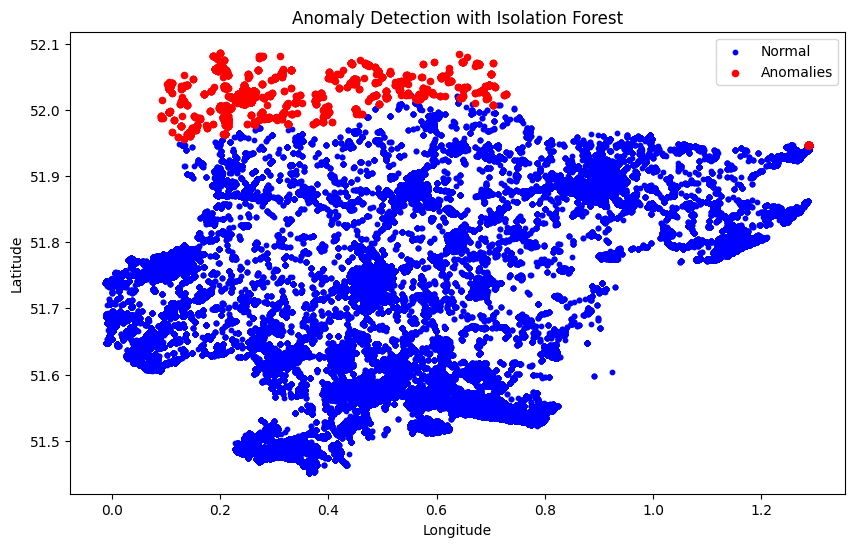

Total points: 511570
Detected anomalies: 5078


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

# --- Load and clean data ---
df = pd.read_csv("EssexCrimeData22-24_filtered.csv")
df = df.dropna(subset=["Longitude", "Latitude"])
df["Longitude"] = df["Longitude"].astype(float)
df["Latitude"] = df["Latitude"].astype(float)

# --- Standardize features ---
coords = df[["Longitude", "Latitude"]].values
scaler = StandardScaler()
coords_scaled = scaler.fit_transform(coords)

# --- Fit Isolation Forest ---
model = IsolationForest(contamination=0.01, random_state=42)  # 1% of data as outliers
df["Anomaly"] = model.fit_predict(coords_scaled)  # -1 = anomaly, 1 = normal

# --- Visualize ---
plt.figure(figsize=(10, 6))
normal = df[df["Anomaly"] == 1]
anomalies = df[df["Anomaly"] == -1]

plt.scatter(normal["Longitude"], normal["Latitude"], c='blue', s=10, label="Normal")
plt.scatter(anomalies["Longitude"], anomalies["Latitude"], c='red', s=20, label="Anomalies")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Anomaly Detection with Isolation Forest")
plt.legend()
plt.show()

# --- Summary ---
print(f"Total points: {len(df)}")
print(f"Detected anomalies: {len(anomalies)}")

# Save anomalies
anomalies.to_csv("crime_anomalies.csv", index=False)
########################################################

import pandas as pd
import folium
from folium.plugins import MarkerCluster
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from IPython.display import IFrame, display

# ---------------- Load and clean data ----------------
csv_file = "EssexCrimeData22-24_filtered.csv"  # Adjust path if needed
df = pd.read_csv(csv_file)
df = df.dropna(subset=["Longitude", "Latitude", "Crime type"])
df["Longitude"] = df["Longitude"].astype(float)
df["Latitude"] = df["Latitude"].astype(float)

# ---------------- Anomaly Detection ----------------
features = df[["Longitude", "Latitude"]].values
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

model = IsolationForest(contamination=0.01, random_state=42)
df["Anomaly"] = model.fit_predict(scaled_features)  # -1 = anomaly

# ---------------- Build Folium Map ----------------
center_lat = df["Latitude"].mean()
center_lon = df["Longitude"].mean()
crime_map = folium.Map(location=[center_lat, center_lon], zoom_start=10)

# Filter only anomalies
anomalies = df[df["Anomaly"] == -1]
crime_types = anomalies["Crime type"].unique()

# One marker cluster per crime type
for crime_type in crime_types:
    cluster = MarkerCluster(name=crime_type).add_to(crime_map)
    subset = anomalies[anomalies["Crime type"] == crime_type]
    
    for _, row in subset.iterrows():
        folium.Marker(
            location=[row["Latitude"], row["Longitude"]],
            popup=f"Crime Type: {row['Crime type']}",
            icon=folium.Icon(color="red", icon="exclamation-sign")
        ).add_to(cluster)

folium.LayerControl().add_to(crime_map)

# ---------------- Display in Notebook ----------------
map_file = "anomalies_by_crime_type_notebook.html"
crime_map.save(map_file)
display(IFrame(map_file, width=850, height=600))



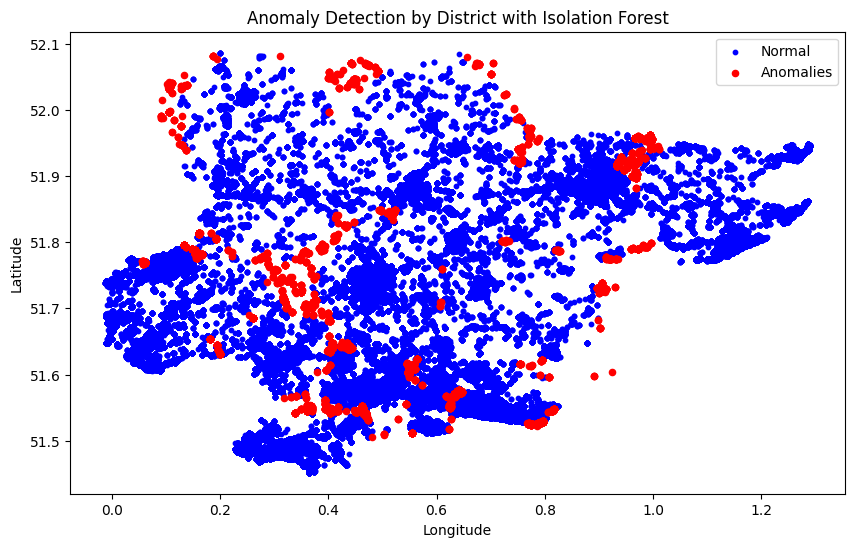

Total points: 511570
Detected anomalies: 5008


C:\Users\chris\AppData\Local\Temp\ipykernel_2180\3406249210.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col])
C:\Users\chris\AppData\Local\Temp\ipykernel_2180\3406249210.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col])
C:\Users\chris\AppData\Local\Temp\ipykernel_2180\3406249210.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



Random Forest Classification Report:


C:\Users\chris\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\chris\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\chris\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

              precision    recall  f1-score   support

           0       0.99      1.00      0.99    151943
           1       0.00      0.00      0.00      1528

    accuracy                           0.99    153471
   macro avg       0.50      0.50      0.50    153471
weighted avg       0.98      0.99      0.99    153471

Confusion Matrix:
[[151943      0]
 [  1528      0]]


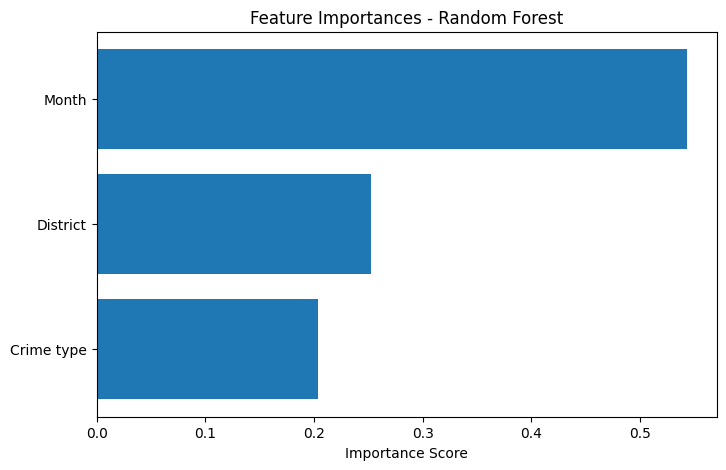

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest, RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import folium
from folium.plugins import MarkerCluster
from IPython.display import IFrame, display

# ---------------- Load and Clean Data ----------------
csv_file = "EssexCrimeData22-24_filtered.csv"
df = pd.read_csv(csv_file)
df = df.dropna(subset=["Longitude", "Latitude", "Crime type", "District"])  # 'District' must exist
df["Longitude"] = df["Longitude"].astype(float)
df["Latitude"] = df["Latitude"].astype(float)

# ---------------- Anomaly Detection Per District ----------------
all_district_anomalies = []
all_district_normals = []

for district, group in df.groupby("District"):
    if len(group) < 10:
        continue  # Skip tiny districts to avoid overfitting
    
    coords = group[["Longitude", "Latitude"]].values
    scaler = StandardScaler()
    coords_scaled = scaler.fit_transform(coords)

    model = IsolationForest(contamination=0.01, random_state=42)
    preds = model.fit_predict(coords_scaled)

    group = group.copy()
    group["Anomaly"] = preds  # -1 = anomaly, 1 = normal
    all_district_anomalies.append(group[group["Anomaly"] == -1])
    all_district_normals.append(group[group["Anomaly"] == 1])

# Combine all districts
anomalies = pd.concat(all_district_anomalies)
normals = pd.concat(all_district_normals)

# ---------------- Visualization of Anomalies ----------------
plt.figure(figsize=(10, 6))
plt.scatter(normals["Longitude"], normals["Latitude"], c='blue', s=10, label="Normal")
plt.scatter(anomalies["Longitude"], anomalies["Latitude"], c='red', s=20, label="Anomalies")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Anomaly Detection by District with Isolation Forest")
plt.legend()
plt.show()

# ---------------- Save Anomalies ----------------
anomalies.to_csv("crime_anomalies_by_district.csv", index=False)

print(f"Total points: {len(df)}")
print(f"Detected anomalies: {len(anomalies)}")

# ---------------- Build Folium Map for Anomalies ----------------
center_lat = df["Latitude"].mean()
center_lon = df["Longitude"].mean()
crime_map = folium.Map(location=[center_lat, center_lon], zoom_start=10)

crime_types = anomalies["Crime type"].unique()

for crime_type in crime_types:
    cluster = MarkerCluster(name=crime_type).add_to(crime_map)
    subset = anomalies[anomalies["Crime type"] == crime_type]
    
    for _, row in subset.iterrows():
        folium.Marker(
            location=[row["Latitude"], row["Longitude"]],
            popup=f"Crime Type: {row['Crime type']}\nDistrict: {row['District']}",
            icon=folium.Icon(color="red", icon="exclamation-sign")
        ).add_to(cluster)

folium.LayerControl().add_to(crime_map)

# ---------------- Display Map in Notebook ----------------
map_file = "anomalies_by_crime_type_district_notebook.html"
crime_map.save(map_file)
display(IFrame(map_file, width=850, height=600))

# ===============================================================
# ------------------- RANDOM FOREST ANALYSIS --------------------
# ===============================================================

# Prepare dataset for Random Forest
# Merge anomalies and normals
anomalies['AnomalyLabel'] = 1
normals['AnomalyLabel'] = 0
full_df = pd.concat([anomalies, normals], ignore_index=True)

# Select features
features = ['Crime type', 'District', 'Month']  # you can add more if needed
X = full_df[features]
y = full_df['AnomalyLabel']

# Encode categorical features
label_encoders = {}
for col in X.columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict and evaluate
y_pred = rf.predict(X_test)
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Feature Importance
importances = rf.feature_importances_
feature_names = X.columns

plt.figure(figsize=(8,5))
plt.barh(feature_names, importances)
plt.title("Feature Importances - Random Forest")
plt.xlabel("Importance Score")
plt.show()



C:\Users\chris\AppData\Local\Temp\ipykernel_2180\2568352553.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col])
C:\Users\chris\AppData\Local\Temp\ipykernel_2180\2568352553.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col])
C:\Users\chris\AppData\Local\Temp\ipykernel_2180\2568352553.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se


Balanced Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.77      0.86    151969
           1       0.01      0.35      0.03      1502

    accuracy                           0.76    153471
   macro avg       0.50      0.56      0.45    153471
weighted avg       0.98      0.76      0.86    153471

Confusion Matrix:
[[116405  35564]
 [   973    529]]


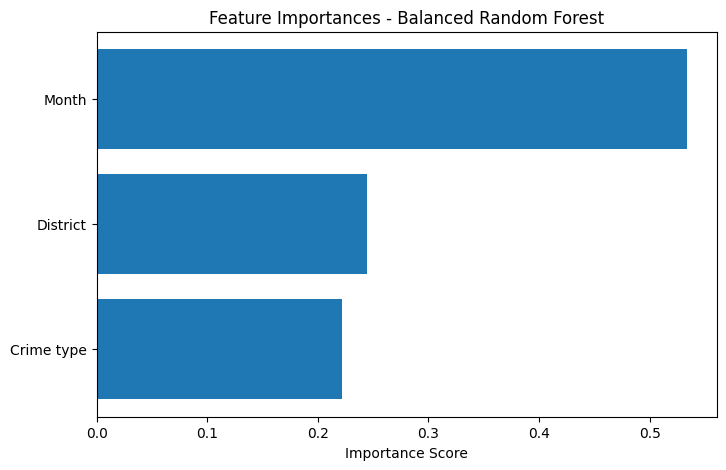

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# ---------------- Prepare Dataset ----------------
# Assume 'full_df' already contains both anomalies and normal crimes
# And it has columns: ['Crime type', 'District', 'Month', 'AnomalyLabel']

features = ['Crime type', 'District', 'Month']
X = full_df[features]
y = full_df['AnomalyLabel']

# Encode Categorical Variables
label_encoders = {}
for col in X.columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# ---------------- Train Balanced Random Forest ----------------
rf = RandomForestClassifier(
    n_estimators=100,
    class_weight="balanced",  # <-- THIS is the fix!
    random_state=42
)

rf.fit(X_train, y_train)

# ---------------- Evaluate Model ----------------
y_pred = rf.predict(X_test)

print("\nBalanced Random Forest Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# ---------------- Feature Importance Plot ----------------
importances = rf.feature_importances_
feature_names = X.columns

plt.figure(figsize=(8,5))
plt.barh(feature_names, importances)
plt.title("Feature Importances - Balanced Random Forest")
plt.xlabel("Importance Score")
plt.show()

# 9. NLP and RAG Integration (Outline)
In the python code below we generate some quick analysis in JSON Format and append to the document called "eda_documents.json" which is where the chatbot will pull the information. My render app reads from "eda_documents.json" and builds the vectorstore from its contents each time it starts.

I created python code in a specific GitHub respository 'https://github.com/cfinal15/crime_map/tree/main'

The web app is deployed using Render, which is connected to the project’s GitHub repository. The application is built with Flask (Python) for the backend and uses HTML/CSS for the frontend layout. When changes (like updates to JSON data or frontend content) are pushed to the GitHub repo, Render automatically rebuilds and redeploys the app.

The main logic resides in the app.py file, which - Loads crime data summaries from eda_documents.json, Converts them into a searchable FAISS index, Powers a Retrieval-Augmented Generation (RAG) chatbot via LangChain and OpenAI

The frontend is defined in templates/index.html, styled with internal CSS, and includes - An embedded Folium map showing crime heatmaps, A live chatbox connected to a Flask /chat endpoint

This structure enables an interactive and data-driven user experience that dynamically updates when new data is committed to GitHub.

In [3]:
import pandas as pd
from datetime import datetime
import uuid

def generate_crime_eda_documents(csv_file_main, csv_file_filtered=None):
    """Generates textual EDA summaries in chunked format for embedding and retrieval."""
    docs = []
    df_main = pd.read_csv(csv_file_main)
    
    df_main["Month"] = pd.to_datetime(df_main["Month"], format="%Y-%m", errors='coerce')
    df_main = df_main.dropna(subset=["Month"])
    df_main["Year"] = df_main["Month"].dt.year

    time_range = f"{df_main['Month'].min().strftime('%Y-%m')} to {df_main['Month'].max().strftime('%Y-%m')}"

    # --- Summary 1: Crime Hotspots ---
    hotspots = df_main.groupby("LSOA name")["Crime ID"].count().sort_values(ascending=False).head(10)
    hotspot_text = f"Top 10 crime hotspots ({time_range}):\n" + "\n".join([f"{i+1}. {area}: {count} crimes" for i, (area, count) in enumerate(hotspots.items())])
    docs.append({
        "id": str(uuid.uuid4()),
        "title": "Top Crime Hotspots",
        "content": hotspot_text,
        "tags": ["hotspot", "lsoa"],
        "time_range": time_range
    })

    # --- Summary 2: Monthly Crime Trends ---
    trends = df_main.groupby("Month")["Crime ID"].count()
    trends_text = f"Monthly crime trends ({time_range}): Crime counts ranged from {trends.min()} to {trends.max()} per month."
    docs.append({
        "id": str(uuid.uuid4()),
        "title": "Monthly Crime Trends",
        "content": trends_text,
        "tags": ["trends", "time-series"],
        "time_range": time_range
    })

    # --- Summary 3: Crimes by Year ---
    yearly_totals = df_main["Year"].value_counts().sort_index()
    year_text = "Total crimes by year:\n" + "\n".join([f"{year}: {count}" for year, count in yearly_totals.items()])
    docs.append({
        "id": str(uuid.uuid4()),
        "title": "Yearly Crime Summary",
        "content": year_text,
        "tags": ["year", "summary"],
        "time_range": time_range
    })

    # --- Summary 4: Crime Types ---
    if "Crime type" in df_main.columns:
        crime_types = df_main["Crime type"].value_counts().head(10)
        type_text = "Most frequent crime types:\n" + "\n".join([f"{crime}: {count}" for crime, count in crime_types.items()])
        docs.append({
            "id": str(uuid.uuid4()),
            "title": "Crime Type Distribution",
            "content": type_text,
            "tags": ["type", "categorical"],
            "time_range": time_range
        })

    # --- Summary 5: District Stats ---
    if csv_file_filtered:
        df_filtered = pd.read_csv(csv_file_filtered)
        if "District" in df_filtered.columns:
            district_counts = df_filtered["District"].value_counts().head(10)
            district_text = "Top districts by crime volume:\n" + "\n".join([f"{dist}: {count}" for dist, count in district_counts.items()])
            docs.append({
                "id": str(uuid.uuid4()),
                "title": "Crime by District",
                "content": district_text,
                "tags": ["district", "regional"],
                "time_range": time_range
            })

    return docs

docs = generate_crime_eda_documents("EssexCrimeData22-24.csv", "EssexCrimeData22-24_filtered.csv")

import json
with open("eda_documents.json", "w") as f:
    json.dump(docs, f, indent=2)

# 10. Summary and Reflection
Summarise findings, reflect on outcomes, and suggest improvements for future analysis.

The Random Forest model developed for predicting crime outcomes

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")

# Load the data
df = pd.read_csv("EssexCrimeData22-24_filtered.csv")

# Drop rows with missing outcome
df = df.dropna(subset=["Last outcome category"])

# Filter out rare outcome classes (< 5 occurrences)
outcome_counts = df["Last outcome category"].value_counts()
valid_outcomes = outcome_counts[outcome_counts >= 5].index
df = df[df["Last outcome category"].isin(valid_outcomes)]

# Select features and target
X = df[["Crime type", "District", "Year"]]
y = df["Last outcome category"]

# One-hot encode categorical features
encoder = OneHotEncoder(sparse_output=False)
X_encoded = encoder.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42, stratify=y
)

# Build and train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("Classification Report:")
print(classification_report(y_test, y_pred, zero_division=0))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


🎯 Classification Report:
                                                     precision    recall  f1-score   support

         Action to be taken by another organisation       0.00      0.00      0.00      2505
                             Awaiting court outcome       0.24      0.02      0.04      1393
                           Court result unavailable       0.37      0.03      0.06      5110
        Formal action is not in the public interest       0.00      0.00      0.00       404
       Further action is not in the public interest       0.00      0.00      0.00      1312
Further investigation is not in the public interest       0.00      0.00      0.00       142
      Investigation complete; no suspect identified       0.71      0.73      0.72     35297
                                   Local resolution       0.47      0.43      0.45      3500
                           Offender given a caution       0.00      0.00      0.00       921
          Offender given a drugs possession 

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

# Load data
df = pd.read_csv("EssexCrimeData22-24.csv")

# Drop rows with missing outcome
df = df.dropna(subset=["Last outcome category", "Crime type"])

# Optional: Filter for more common outcome categories
outcome_counts = df["Last outcome category"].value_counts()
valid_outcomes = outcome_counts[outcome_counts >= 100].index  # adjust threshold if needed
df = df[df["Last outcome category"].isin(valid_outcomes)]

# Features and target
X = df[["Crime type"]]
y = df["Last outcome category"]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

# One-hot encode the crime type
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), ["Crime type"])
    ]
)

# Logistic regression pipeline
pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression(max_iter=1000))
])

# Fit model
pipeline.fit(X_train, y_train)

# Predict
y_pred = pipeline.predict(X_test)

# Report with suppressed warning
print(classification_report(y_test, y_pred, zero_division=0))


                                                     precision    recall  f1-score   support

         Action to be taken by another organisation       0.00      0.00      0.00      3161
                             Awaiting court outcome       0.00      0.00      0.00      1782
                           Court result unavailable       0.00      0.00      0.00      6481
        Formal action is not in the public interest       0.00      0.00      0.00       513
       Further action is not in the public interest       0.00      0.00      0.00      1652
Further investigation is not in the public interest       0.00      0.00      0.00       178
      Investigation complete; no suspect identified       0.71      0.73      0.72     44776
                                   Local resolution       0.46      0.41      0.43      4468
                           Offender given a caution       0.00      0.00      0.00      1167
                          Status update unavailable       0.00      0

In [8]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

# Load data
df = pd.read_csv("EssexCrimeData22-24_filtered.csv")

# Drop missing values
df = df.dropna(subset=["Crime type", "Last outcome category"])

# Encode target variable: outcome as numeric
label_encoder = LabelEncoder()
df["Outcome_encoded"] = label_encoder.fit_transform(df["Last outcome category"])

# Features and target
X = df[["Crime type"]]
y = df["Outcome_encoded"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# One-hot encode crime types
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), ["Crime type"])
    ]
)

# Build pipeline
pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("regressor", LinearRegression())
])

# Fit model
pipeline.fit(X_train, y_train)

# Predict
y_pred = pipeline.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")


Mean Squared Error: 15.06
R² Score: 0.12


# Attempts to connect to API and store crime into csv
### Tried using API method for storing crime for each individual force, kept getting 400 code error due to large amount of characters. 400 code error explained in Police UK documentation 
### API method work when filtering for singular location and giving long/lat coordinates

In [3]:
import requests
import time
import json
import csv
from datetime import datetime

# Base API URL
BASE_URL = "https://data.police.uk/api"

# Define years and months to fetch data
YEARS = [2022, 2023, 2024]
MONTHS = [f"{year}-{str(month).zfill(2)}" for year in YEARS for month in range(1, 13)]

# CSV file name
CSV_FILENAME = "crime_data_2020_2024.csv"

# Headers for CSV file
CSV_HEADERS = ["Crime ID", "Force Name", "Category", "Outcome", "Longitude", "Latitude", "Location", "Street Name", "Month"]

# Function to get list of police forces
def get_police_forces():
    response = requests.get(f"{BASE_URL}/forces")
    if response.status_code == 200:
        return response.json()
    else:
        print("❌ Error fetching police forces.")
        return []

# Function to fetch crimes for a force and month
def fetch_crimes(force_id, force_name, date):
    url = f"{BASE_URL}/crimes-no-location"
    params = {"category": "all-crime", "force": force_id, "date": date}
    response = requests.get(url)

    if response.status_code == 200:
        crimes = response.json()
        return [
            {
                "Crime ID": crime.get("id", "N/A"),
                "Force Name": force_name,
                "Category": crime.get("category", "Unknown"),
                "Outcome": crime.get("outcome_status", {}).get("category", "No Outcome"),
                "Longitude": crime.get("location", {}).get("longitude", "N/A"),
                "Latitude": crime.get("location", {}).get("latitude", "N/A"),
                "Location": crime.get("location", {}).get("street", {}).get("name", "Unknown"),
                "Street Name": crime.get("location", {}).get("street", {}).get("name", "Unknown"),
                "Month": date
            }
            for crime in crimes
        ]
    else:
        print(f"⚠️ Failed to fetch crimes for {force_name} in {date}")
        return []

# Function to save data to CSV
def save_to_csv(crime_data, filename=CSV_FILENAME):
    with open(filename, "w", newline="", encoding="utf-8") as csv_file:
        writer = csv.DictWriter(csv_file, fieldnames=CSV_HEADERS)
        writer.writeheader()
        writer.writerows(crime_data)
    print(f"\n✅ Crime data saved to {filename}")

# Main function to download and process crime data
def download_crime_data():
    forces = get_police_forces()
    all_crimes = []

    for force in forces:
        force_id = force["id"]
        force_name = force["name"]
        print(f"🔄 Fetching data for {force_name}...")

        for date in MONTHS:
            crimes = fetch_crimes(force_id, force_name, date)
            all_crimes.extend(crimes)
            time.sleep(2)  # Avoid hitting API rate limits

    print("\n📊 Converting data to CSV...")
    save_to_csv(all_crimes)

# Run the script
download_crime_data()


🔄 Fetching data for Avon and Somerset Constabulary...
⚠️ Failed to fetch crimes for Avon and Somerset Constabulary in 2022-01
⚠️ Failed to fetch crimes for Avon and Somerset Constabulary in 2022-02
⚠️ Failed to fetch crimes for Avon and Somerset Constabulary in 2022-03


KeyboardInterrupt: 

In [7]:
import csv
import time
from police_api import PoliceAPI
from datetime import datetime

# Initialize Police API
api = PoliceAPI()

# Define years and months to fetch data
YEARS = [2020, 2021, 2022, 2023, 2024]
MONTHS = [f"{year}-{str(month).zfill(2)}" for year in YEARS for month in range(1, 13)]

# Output CSV file name
CSV_FILENAME = "crime_data_2020_2024.csv"

# Define CSV headers
CSV_HEADERS = ["Crime ID", "Force Name", "Category", "Outcome", "Longitude", "Latitude", "Location", "Month"]

# Function to fetch crime data
def fetch_crimes():
    all_crimes = []
    forces = api.get_forces()  # Fetch list of police forces

    for force in forces:
        force_id = force.id
        force_name = force.name
        print(f"🔄 Fetching data for {force_name}...")

        for date in MONTHS:
            try:
                crimes = api.get_crimes_no_location(force=force_id, date=date)
                crime_list = [
                    {
                        "Crime ID": crime.id if crime.id else "N/A",
                        "Force Name": force_name,
                        "Category": crime.category,
                        "Outcome": crime.outcome if crime.outcome else "No Outcome",
                        "Longitude": crime.location.longitude if crime.location else "N/A",
                        "Latitude": crime.location.latitude if crime.location else "N/A",
                        "Location": crime.location.street_name if crime.location else "Unknown",
                        "Month": date
                    }
                    for crime in crimes
                ]
                all_crimes.extend(crime_list)

                print(f"✅ {len(crime_list)} crimes fetched for {force_name} in {date}.")
                
            except Exception as e:
                print(f"🚨 Error fetching crimes for {force_name} in {date}: {e}")

            time.sleep(2)  # ✅ Delay to avoid hitting rate limits

    return all_crimes

# Function to save data as CSV
def save_to_csv(crime_data, filename=CSV_FILENAME):
    with open(filename, "w", newline="", encoding="utf-8") as csv_file:
        writer = csv.DictWriter(csv_file, fieldnames=CSV_HEADERS)
        writer.writeheader()
        writer.writerows(crime_data)
    
    print(f"\n✅ Crime data saved to {filename}")

# Run script
crime_data = fetch_crimes()
save_to_csv(crime_data)

🔄 Fetching data for Avon and Somerset Constabulary...
🚨 Error fetching crimes for Avon and Somerset Constabulary in 2020-01: <unknown error code>
🚨 Error fetching crimes for Avon and Somerset Constabulary in 2020-02: <unknown error code>
🚨 Error fetching crimes for Avon and Somerset Constabulary in 2020-03: <unknown error code>


KeyboardInterrupt: 

In [12]:
import requests
import csv

# Define the base URL for the Police UK API
base_url = "https://data.police.uk/api/crimes-street/all-crime"

# Define the parameters for the API request
params = {
    "lat": "52.629729",  # Latitude of the area you're interested in
    "lng": "-1.131592",  # Longitude of the area you're interested in
    "date": "2023-01"    # Date in YYYY-MM format
}

# Make the request to the API
response = requests.get(base_url, params=params)

# Check if the request was successful
if response.status_code == 200:
    # Parse the JSON response
    crime_data = response.json()
    
    # Define the CSV file name
    csv_file = "crime_data.csv"
    
    # Open the CSV file for writing
    with open(csv_file, mode='w', newline='', encoding='utf-8') as file:
        # Create a CSV writer object
        writer = csv.writer(file)
        
        # Write the header row
        writer.writerow(["Category", "Location", "Outcome", "Month", "Latitude", "Longitude"])
        
        # Write each crime record to the CSV file
        for crime in crime_data:
            # Safely access nested fields
            location = crime.get("location", {})
            street = location.get("street", {}) if location else {}
            outcome_status = crime.get("outcome_status", {}) if crime.get("outcome_status") else {}
            
            writer.writerow([
                crime.get("category", "N/A"),
                street.get("name", "N/A"),
                outcome_status.get("category", "N/A"),
                crime.get("month", "N/A"),
                location.get("latitude", "N/A"),
                location.get("longitude", "N/A")
            ])
    
    print(f"Crime data has been successfully written to {csv_file}")
else:
    print(f"Failed to retrieve data: {response.status_code}")

Crime data has been successfully written to crime_data.csv
